<a href="https://colab.research.google.com/github/piorrico/task2/blob/main/CUSTOMER_SEGMENTATION_USING_UNSUPERVISED_METHODS_AND_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABSTRACT**

The process for implementing customer segmentation in this code follows a the IPO methodology described in the methodology part of this study. The process includes data preprocessing tech-niques, assumptions for implementing unsupervised machine learning methods(K-MEANS++) and RFM analysis.


# **1) INPUT**

##  DATA COLLECTION

### 1.1 LIBRARY IMPORTATION

In [18]:
pip install weightedstats


In [19]:
#Library Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
import math
from statistics import median
from scipy.stats import skew
import weightedstats as ws
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import kstest
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D



### 1.2 DATA IMPORTATION

In [20]:
# Datasets importation from Google Drive folder
#Customer Dataset
customers_url = 'https://drive.google.com/file/d/1trjIdykod5jlh4JCk7ZRSoKXFvovra68/view?usp=share_link'
customers_path = 'https://drive.google.com/uc?export=download&id='+customers_url.split('/')[-2]
customers_data = pd.read_csv(customers_path)
#Geolocation Dataset
geolocation_url = 'https://drive.google.com/file/d/1g635f6qGuFpqtIKe63ss2X6YgOHSLDLR/view?usp=share_link'
geolocation_path = 'https://drive.google.com/uc?export=download&id='+geolocation_url.split('/')[-2]
geolocation_data = pd.read_csv(geolocation_path)
#Items Dataset
items_url = 'https://drive.google.com/file/d/18acVf2ciN0As5Q5GbA2PnO6HyF_dOrz4/view?usp=share_link'
items_path = 'https://drive.google.com/uc?export=download&id='+items_url.split('/')[-2]
items_data = pd.read_csv(items_path)
#Payments Dataset
payments_url = 'https://drive.google.com/file/d/1CH48eJjls-_gfjMPXAAxtx1Sh0cGUq67/view?usp=share_link'
payments_path = 'https://drive.google.com/uc?export=download&id='+payments_url.split('/')[-2]
payments_data = pd.read_csv(payments_path)
#Reviews Dataset
reviews_url = 'https://drive.google.com/file/d/14EEawWIHYafD-kLbJUVeYIM9L-c1nw24/view?usp=share_link'
reviews_path = 'https://drive.google.com/uc?export=download&id='+reviews_url.split('/')[-2]
reviews_data = pd.read_csv(reviews_path)
# Orders Dataset
orders_url = 'https://drive.google.com/file/d/1QVPJERDEvBFq6tLPEvfH-OfhdHOWQV67/view?usp=share_link'
orders_path = 'https://drive.google.com/uc?export=download&id='+orders_url.split('/')[-2]
orders_data = pd.read_csv(orders_path)

# Products Dataset
products_url = 'https://drive.google.com/file/d/1HlLVfY8GrjIxRXsvqm8FaIdJS4WIIL1Q/view?usp=share_link'
products_path = 'https://drive.google.com/uc?export=download&id='+products_url.split('/')[-2]
products_data = pd.read_csv(products_path)
# Sellers Dataset
sellers_url = 'https://drive.google.com/file/d/18s2z6P6noAyaRSK2ttTsU_g3porLucOg/view?usp=share_link'
sellers_path = 'https://drive.google.com/uc?export=download&id='+sellers_url.split('/')[-2]
sellers_data= pd.read_csv(sellers_path)
# Sellers Dataset
category_name_trans_url= 'https://drive.google.com/file/d/12ApARlTizxPK3M9pAmcVbpMhQm5zPuf2/view?usp=share_link'
category_name_trans_path = 'https://drive.google.com/uc?export=download&id='+category_name_trans_url.split('/')[-2]
category_name_trans_data= pd.read_csv(category_name_trans_path)


In [21]:
#Data Understanding of each dataset before merging them. The table present: Total Rows,	Total Columns,	Total Duplicates and 	Total Null

# Datasets names
datasets = [
    customers_data,
    geolocation_data,
    items_data,
    payments_data,
    reviews_data,
    orders_data,
    products_data,
    sellers_data,
    category_name_trans_data
]
titles = [
    "Customers",
    "Geolocation",
    "Items",
    "Payments",
    "Reviews",
    "Orders",
    "Products",
    "Sellers",
    "Category Translation"
]

# Store the data
data_summary = {
    'Name of Dataset': titles,
    'Column names': [', '.join(data.columns) for data in datasets],
    'Total number of  Rows': [data.shape[0] for data in datasets],
    'Total  number of Columns': [data.shape[1] for data in datasets],
    'Duplicates': [data.duplicated().sum() for data in datasets],
    'Null Values': [data.isnull().sum().sum() for data in datasets],
    'Null Columns': [', '.join(data.columns[data.isnull().any()]) for data in datasets]
}

#  Appended Dataframe for analysis
data_summary_df = pd.DataFrame(data_summary)
data_summary_styled = data_summary_df.style.background_gradient(cmap='YlGnBu')

# Print the table with values
data_summary_styled

,Name of Dataset,Column names,Total number of Rows,Total number of Columns,Duplicates,Null Values,Null Columns
0,Customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,Geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,Items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,Payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,Reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,Orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,Products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,Sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,Category Translation,"product_category_name, product_category_name_english",71,2,0,0,


### 1.3 MERGING THE DATA

In [30]:
#Datasets merging process with key variables
olist_dataset= pd.merge(customers_data, orders_data, on="customer_id", how='inner')
olist_dataset= olist_dataset.merge(reviews_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(items_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(products_data, on="product_id", how='inner')
olist_dataset= olist_dataset.merge(payments_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(sellers_data, on='seller_id', how='inner')
olist_dataset= olist_dataset.merge(category_name_trans_data, on='product_category_name', how='inner')
#olist_dataset= olist_dataset.merge(geolocation_data, on='customer_zip_code_prefix', how='inner')
olist_dataset.shape



(115609, 40)

Column names of Olist merged dataset

In [31]:
olist_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [32]:
olist_dataset.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [33]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

# **2) PROCESS**

## DATA PREPROCESSING

### 2.1 INCONSISTENCIES AND MISSING VALUES TREATMENT

In [34]:
#Store the Pre processed data in a new dataframe for preprocessing purposes
olist_df=olist_dataset.copy()

In [35]:
#Convert variables date to appropriate date format
olist_df['order_purchase_timestamp'] = pd.to_datetime(olist_df['order_purchase_timestamp'])
olist_df['order_delivered_customer_date'] = pd.to_datetime(olist_df['order_delivered_customer_date'])
olist_df['order_estimated_delivery_date'] = pd.to_datetime(olist_df['order_estimated_delivery_date'])
olist_df['shipping_limit_date'] = pd.to_datetime(olist_df['shipping_limit_date'])
olist_df['order_delivered_carrier_date'] =pd.to_datetime(olist_df['order_delivered_carrier_date'])
olist_df['order_approved_at'] =pd.to_datetime(olist_df['order_approved_at'])

In [36]:
# Calculate another variable: Total shipping days (to check inconsistencies)
olist_df['total_shipping_days'] = olist_df['order_delivered_customer_date'] - olist_df['order_delivered_carrier_date']

In [37]:
# List of columns to modify
columns_to_modify = [ 'total_shipping_days'
                     ]

# After calculating the total shipping  days, it is necessary to convert the result to number of days format as follows
for col in columns_to_modify:
    olist_df[col] = olist_df[col].apply(lambda x: round(x.total_seconds() / 86400, 4) if isinstance(x, pd.Timedelta) else x)

In [38]:
# Percentage of missing data
missing_data = pd.concat([(olist_df.isnull().sum()), (olist_df.isnull().sum() * 100 / olist_df.isnull().count())], axis=1, keys=['Total', 'Percentage of Missing Values']).sort_values(by='Total', ascending=False)
missing_data

,Total,Percentage of Missing Values
review_comment_title,101808,88.062348
review_comment_message,66703,57.697065
total_shipping_days,2401,2.076828
order_delivered_customer_date,2400,2.075963
order_delivered_carrier_date,1195,1.033657
order_approved_at,14,0.012110
product_width_cm,1,0.000865
product_weight_g,1,0.000865
product_length_cm,1,0.000865
product_height_cm,1,0.000865


In [39]:

# Filter the DataFrame by unique order_id values
filtered_df = olist_df.drop_duplicates(subset='order_id')
# Calculate  the percentage of each order status
order_status_counts = filtered_df['order_status'].value_counts()
order_status_percentages = filtered_df['order_status'].value_counts(normalize=True) * 100

# On a new dataframe, store the results
order_status_summary = pd.DataFrame({
    'Order Status Count': order_status_counts,
    'Order Status Percentage': order_status_percentages.round(2)
})

# Print the results of the table
order_status_summary


,Order Status Count,Order Status Percentage
delivered,94488,97.90
shipped,1008,1.04
canceled,428,0.44
invoiced,300,0.31
processing,284,0.29
unavailable,6,0.01
approved,2,0.00


In [40]:
#Select only the orders that are labelled as delivered
olist_df = olist_df[olist_df['order_status'] == 'delivered']

In [41]:
# Order status of orders where: order delivered carrier date and order deliveres customer date are null
selected_rows = olist_df.loc[olist_df['order_delivered_carrier_date'].isna() & olist_df['order_delivered_customer_date'].isna()]

status_counts = selected_rows['order_status'].value_counts()

print(status_counts)


delivered    1
Name: order_status, dtype: int64


In [42]:
#Negative values of total shipping days(inconsitencies)
negative_shipping_days_rows = olist_df[olist_df['total_shipping_days'] < 0]
negative_shipping_days_rows.count()['total_shipping_days']

58

In [43]:
#Drop all the shipping days that are less than 0(date inconsistencies)
olist_df = olist_df[olist_df['total_shipping_days'] >= 0]

In [44]:
# Count of missing Values
print(" \nCount of missing values : \n\n",
      olist_df.isnull().sum())

 
Count of missing values : 

 customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             99650
review_comment_message           65818
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name            

There are 14 orders that have missing values in order_approved_at column but have a status of DELIVERED. Since these rows where delivered, the columns will not be removed.

In [45]:
#Missing values in order delivered carrier date
olist_df.loc[olist_df['order_approved_at'].isna(),
                   ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status']]

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_status
4576,2017-02-18 15:52:27,2017-02-23 03:09:14,2017-03-07 13:57:47,delivered
4625,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,delivered
4694,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,delivered
18720,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,delivered
22870,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,delivered
43176,2017-02-17 15:53:27,2017-02-22 11:31:30,2017-03-03 11:47:47,delivered
51949,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,delivered
51991,2017-02-18 17:15:03,2017-02-22 11:23:11,2017-03-03 18:43:43,delivered
52021,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,delivered
88985,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,delivered


In [46]:

#Fill all the Nan rows from order_approved_at column with Nat(no time)
olist_df['order_approved_at']= olist_df['order_approved_at'].fillna(pd.NaT)

In [47]:
# Drop all the orders that have nan values in order_delivered_customer_date and order_delivered_carrier_date
olist_df= olist_df.drop(olist_df.loc[(olist_df['order_delivered_customer_date'].isna() )
          ].index)

In [48]:
olist_df['payment_type'].value_counts()

credit_card    83492
boleto         22016
voucher         6013
debit_card      1622
Name: payment_type, dtype: int64

There is one product of the dataset that does not contain information about its size. Therefore it will be removed.

In [49]:
#Product that has no volume
null_mask = olist_df['product_length_cm'].isnull()
null_rows = olist_df[null_mask]
null_rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_shipping_days
27352,1d088dea8732788ec35dd4ee6dd76112,69b2b29382af03e03e486ad307a76000,90160,porto alegre,RS,85f8ad45e067abd694b627859fa57453,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,...,NaN,1,credit_card,10,1961.0,86020,londrina,PR,baby,5.2368


In [50]:
#Drop the selected product without information
null_mask = olist_df['product_length_cm'].isnull()
null_rows = olist_df[null_mask]
olist_df = olist_df.drop(null_rows.index).reset_index(drop=True)

### 2.2 FEATURE ENGINEERING: RFM ANALYSIS

In [51]:
#Store the Pre processed data in a new dataframe
olist_df_cleaned=olist_df.copy()


In [52]:
olist_df_cleaned['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

As mentioned in the theory part of the thesis. The RFM variables are described as follows.

*   Recency (R): The time between the last purchase and a specific date to the present was determined as the Recency component of each customer.
*   Frequency (F): The frequency component was computed by counting the number of Order IDs that each customer has on its Customer Unique ID code
*   Monetary (M): the monetary component represents the total value of all orders made (identified by their Order IDs) during a specific period.






In [53]:
# It is important to obtain the last purchase date in order to set the analysis date for the the RFM calculation.
#The analysis date is one date after the last purchase of the dataset.

# Convert 'order_purchase_timestamp' to datetime type
olist_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(olist_df_cleaned['order_purchase_timestamp'])

# Set the date for analysis
current_date = olist_df_cleaned['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
# Print the last purchase date
print(current_date)


2018-08-30 15:00:37


In [54]:
#Recency calculation
sorted_recency_df = olist_df_cleaned.sort_values('order_purchase_timestamp', ascending=False)
recency_df = sorted_recency_df.loc[:, ['order_purchase_timestamp', 'customer_unique_id']]
recency_df = olist_df_cleaned.groupby('customer_unique_id').apply(lambda x: pd.Series({
   'order_purchase_timestamp': x['order_purchase_timestamp'].max(),
    'Recency': (current_date - x['order_purchase_timestamp'].max()).days

})).reset_index()

#Print the  recency dataframe
print(recency_df)


                     customer_unique_id order_purchase_timestamp  Recency
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      112
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      115
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      537
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      321
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      288
...                                 ...                      ...      ...
91445  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36      447
91446  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56      262
91447  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16      568
91448  ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41      119
91449  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45      484

[91450 rows x 3 columns]


In [55]:
#Frequency calculation
frequency_df2 = pd.DataFrame( olist_df_cleaned.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df2.rename(columns={"order_id":"Frequency"}, inplace=True)
#frequency_df

frequency_df=olist_df_cleaned.groupby('customer_unique_id')['product_id'].size().reset_index(name='Frequency')
#Sort the recency column
frequency_df  = frequency_df.sort_values('Frequency', ascending=False)
#print frequency dataframe
print(frequency_df)

                     customer_unique_id  Frequency
55221  9a736b248f67d166d2fbb006bcb877c3         75
39990  6fbc7cdadbb522125f4b27ae9dee4060         38
89258  f9ae226291893fda10af7965268fb7f6         35
31025  569aa12b73b5f7edeaa6f2a01603e381         26
47750  85963fd37bfd387aa6d915d8a1065486         24
...                                 ...        ...
32864  5b97eb89e71d8e7cbe9b3023a4d69f97          1
32863  5b976dd4f77ac841d7027290494b8dbe          1
32862  5b96a6a7d5de5738179accb10c9af8aa          1
32861  5b9603bf6b5ba113060bd41f770c725e          1
91449  ffffd2657e2aad2907e67c3e9daecbeb          1

[91450 rows x 2 columns]


In [56]:
#Monetary Calculation
monetary_df=olist_df_cleaned.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='Monetary')
#Sort the recency column
monetary_df  = monetary_df.sort_values('Monetary', ascending=False)
#Print monetary dataframe
print(monetary_df)


                     customer_unique_id   Monetary
3655   0a0a92112bd4c708ca5fde585afaa872  109312.64
70122  c402f431464c72e27330a67f7b94d4fb   44048.00
22936  4007669dec559734d6f53e029e360987   36489.24
85676  ef8d54b3797ea4db1d63f0ced6a906e9   30186.00
42284  763c8b1c9c68a0229c42c9fc6f662b93   29099.52
...                                 ...        ...
39865  6f5b9d1cdccc4d28f0483a612edecacf      11.63
14505  2878e5b88167faab17d4fb83a986d38b      11.63
64140  b33336f46234b24a613ad9064d13106d      10.89
67635  bd06ce0e06ad77a7f681f1a4960a3cc6      10.07
17731  317cfc692e3f86c45c95697c61c853a6       9.59

[91450 rows x 2 columns]


In [57]:
#Datasets merging process with key variables. In this step the R, F and M dataframes that were generated before beingre merged into one dataframe.
RFM_df= pd.merge(recency_df, frequency_df2, on="customer_unique_id", how='inner')
RFM_df= RFM_df.merge(monetary_df, on="customer_unique_id", how='inner')
RFM_df.describe()

,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000
mean,237.054073,1.032859,212.248263
std,152.541250,0.206200,631.325605
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.830000
50%,218.000000,1.000000,112.830000
75%,345.000000,1.000000,202.657500
max,695.000000,14.000000,109312.640000


In [58]:
# Compute quantiles for each feature
quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])
#Enconding the variables R, F and M from 1 to 5
# Assign quartile labels for each feature using apply() method
RFM_Segment = RFM_df.copy()
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(lambda x: sum(x <= quantiles['Recency'].values) + 1)
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(lambda x: sum(x <= quantiles['Frequency'].values) + 1)
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(lambda x: sum(x >= quantiles['Monetary'].values) + 1)

# Concatenate the quartile labels to form the RFMClass label
RFM_Segment['RFMClass'] = RFM_Segment['R_Quartile'].map(str) \
                            + RFM_Segment['F_Quartile'].map(str) \
                            + RFM_Segment['M_Quartile'].map(str)


<ipython-input-58-25ae1ac11dd8>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])


In [59]:
#Overview of quantiles of R, F and M
#Print the quantile values
print(quantiles)

     Recency  Frequency  Monetary
0.2     91.0        1.0    56.010
0.4    176.0        1.0    89.660
0.6    268.0        1.0   139.930
0.8    381.0        1.0   238.182


In [60]:
#Counting the number of RFM scores
RFM_Segment['RFMClass'].value_counts()

351    3859
252    3856
151    3790
152    3724
554    3708
353    3653
553    3642
453    3635
551    3627
454    3602
352    3566
451    3550
354    3530
255    3521
552    3520
153    3516
253    3505
452    3495
154    3471
455    3443
251    3429
555    3304
155    3301
254    3278
355    3220
515     342
315     340
415     312
215     291
115     216
314     159
514     158
414     136
214     135
114     118
513      75
213      74
413      72
313      67
113      48
412      31
112      30
212      29
512      26
312      22
111       8
411       7
311       3
211       3
511       3
Name: RFMClass, dtype: int64

In [61]:
RFM_Segment.describe()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,91450.000000,91450.000000,91450.000000,91450.000000,91450.000000,91450.000000
mean,237.054073,1.032859,212.248263,3.005774,4.881684,3.000197
std,152.541250,0.206200,631.325605,1.414256,0.677695,1.414105
min,1.000000,1.000000,9.590000,1.000000,1.000000,1.000000
25%,114.000000,1.000000,63.830000,2.000000,5.000000,2.000000
50%,218.000000,1.000000,112.830000,3.000000,5.000000,3.000000
75%,345.000000,1.000000,202.657500,4.000000,5.000000,4.000000
max,695.000000,14.000000,109312.640000,5.000000,5.000000,5.000000


In [62]:
#Merging the dataframes in order to get a table with the following information:
#customer_unique_id, order_purchase_timestamp, Recency, Frequency, Monetary, and RFMClass(RFM score)
# Check column names and data types
print("Column Names and Data Types Before Merge:")
print("RFM_df columns:", RFM_df.columns)
print("RFM_Segment columns:", RFM_Segment.columns)

# Convert 'customer_unique_id' column to a consistent case
RFM_df['customer_unique_id'] = RFM_df['customer_unique_id'].str.lower()
RFM_Segment['customer_unique_id'] = RFM_Segment['customer_unique_id'].str.lower()

# Merge the RFM class to the RFM_df
RFM_df = pd.merge(RFM_df, RFM_Segment[['customer_unique_id', 'RFMClass']],
                  on='customer_unique_id', how='left')

# Check the merged DataFrame
print("\nMerged DataFrame:")
print(RFM_df)



Column Names and Data Types Before Merge:
RFM_df columns: Index(['customer_unique_id', 'order_purchase_timestamp', 'Recency',
       'Frequency', 'Monetary'],
      dtype='object')
RFM_Segment columns: Index(['customer_unique_id', 'order_purchase_timestamp', 'Recency',
       'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile', 'M_Quartile',
       'RFMClass'],
      dtype='object')

Merged DataFrame:
                     customer_unique_id order_purchase_timestamp  Recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      112   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      115   
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      537   
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      321   
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      288   
...                                 ...                      ...      ...   
91445  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 

Descriptive statistics for Recency:
count    91450.000000
mean       237.054073
std        152.541250
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91450.000000
mean         1.032859
std          0.206200
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
10.66

Descriptive statistics for Monetary:
count     91450.000000
mean        212.248263
std         631.325605
min           9.590000
25%          63.830000
50%         112.830000
75%         202.657500
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.65



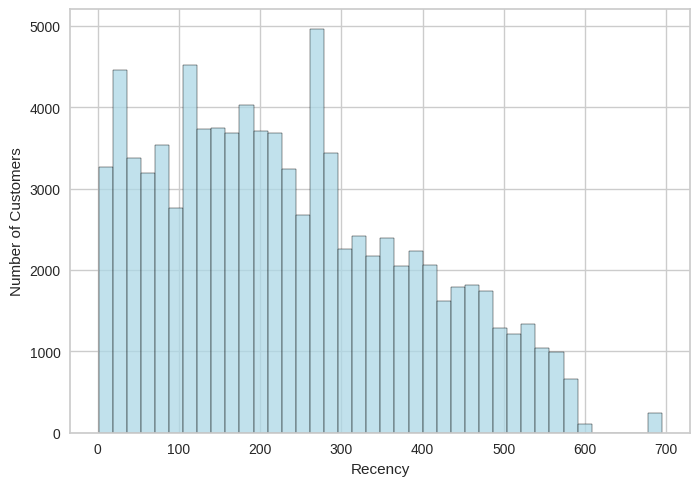

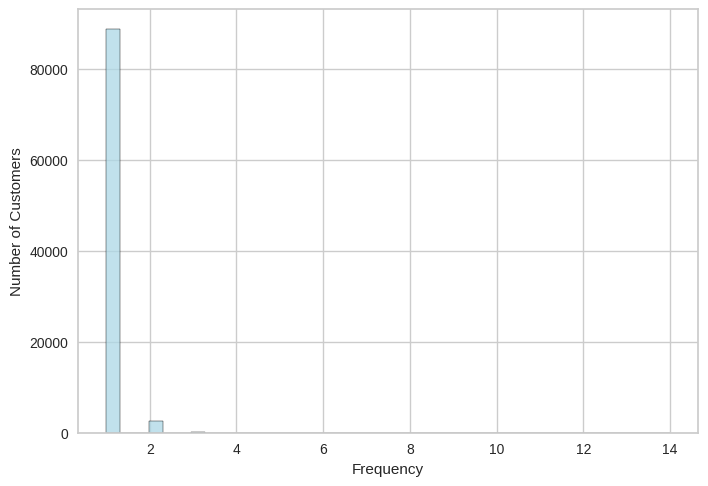

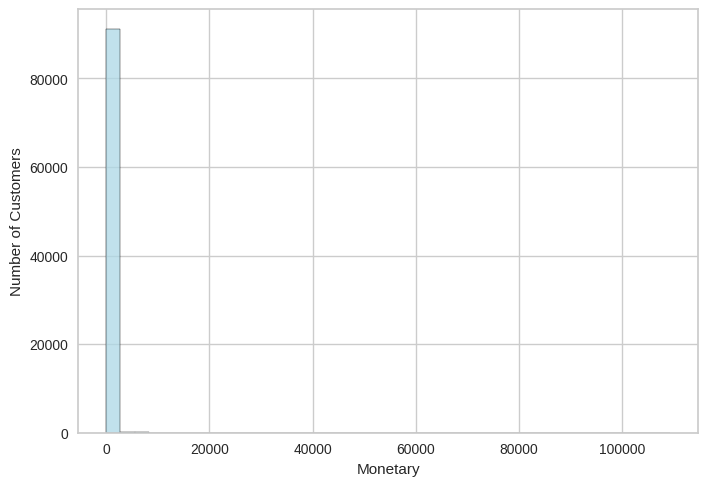

In [63]:

#Frequency distribution of Recency, Frequency and Monetary

# Replace 'RFM_df' with your actual DataFrame containing RFM data
rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")

    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black')
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid

    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")


<ipython-input-64-3b49624b1484>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
<ipython-input-64-3b49624b1484>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
<ipython-input-64-3b49624b1484>:5: UserWarning: 



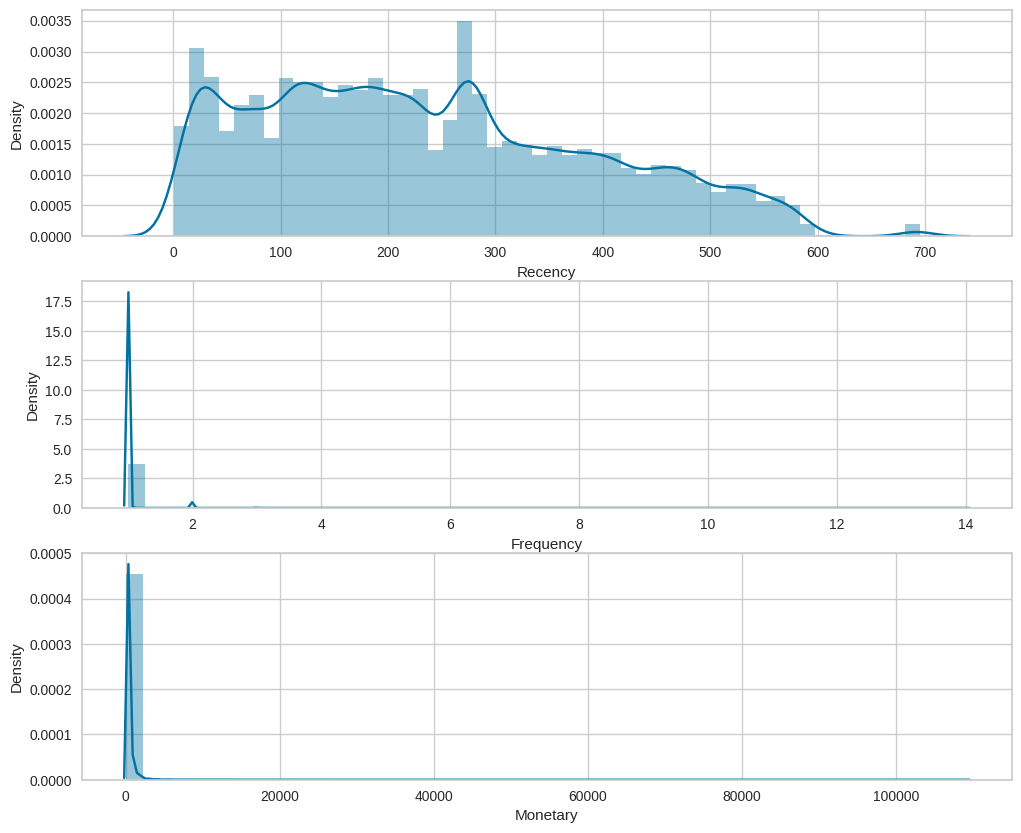

In [64]:
#Another visualization of frequency  distributions of RFM variables
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

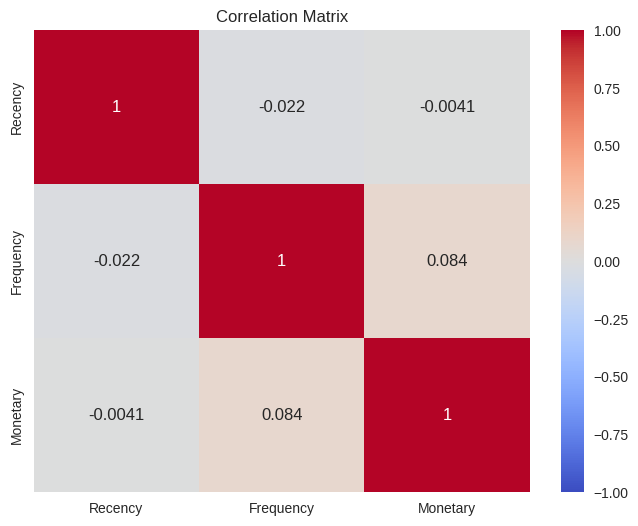

In [65]:
#Univariate Analysis of RFM variables. The results show that there is no correlation between RFM variables
#Pearson Correlation
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

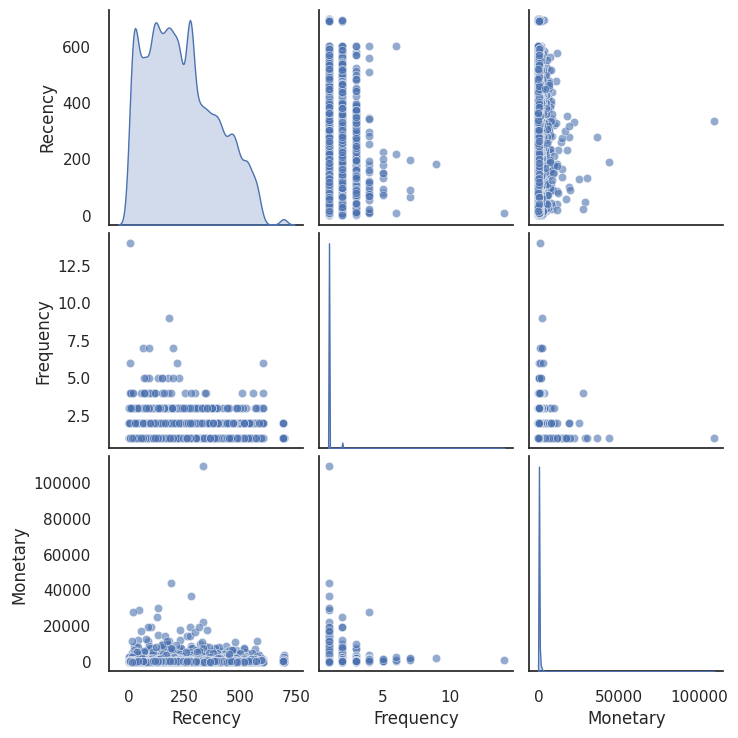

In [66]:
#Plot the results fo the Pearson correlation  using correlogram library

# Calculate the correlation matrix
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()

# Plot the correlogram
sns.set(style='white')
sns.pairplot(RFM_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', plot_kws={'alpha': 0.6})

plt.show()


In [67]:
# Check normality in Recency column using Kolmogorov-Smirnov test
# Select the specific column for distribution check
column_name = 'Recency'
data = RFM_df['Recency']

# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(data, 'norm')

# Set significance level
alpha = 0.05

# Check distribution
if p_value > alpha:
    print(f"The data in column '{column_name}' follows a normal distribution.")
else:
    print(f"The data in column '{column_name}' does not follow a normal distribution.")


The data in column 'Recency' does not follow a normal distribution.


In [68]:


# Check normality in Recency column using Shapiro-Wilk test

statistic, p_value = shapiro(rfm_data['Recency'])

# Print the test results
print('Shapiro-Wilk Test - Recency')
print('Test Statistic:', statistic)
print('p-value:', p_value)

# Interpret the test results
alpha = 0.05  # Set the significance level
if p_value > alpha:
    print('The Recency variable follows a normal distribution.')
else:
    print('The Recency variable does not follow a normal distribution.')

Shapiro-Wilk Test - Recency
Test Statistic: 0.9609517455101013
p-value: 0.0
The Recency variable does not follow a normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


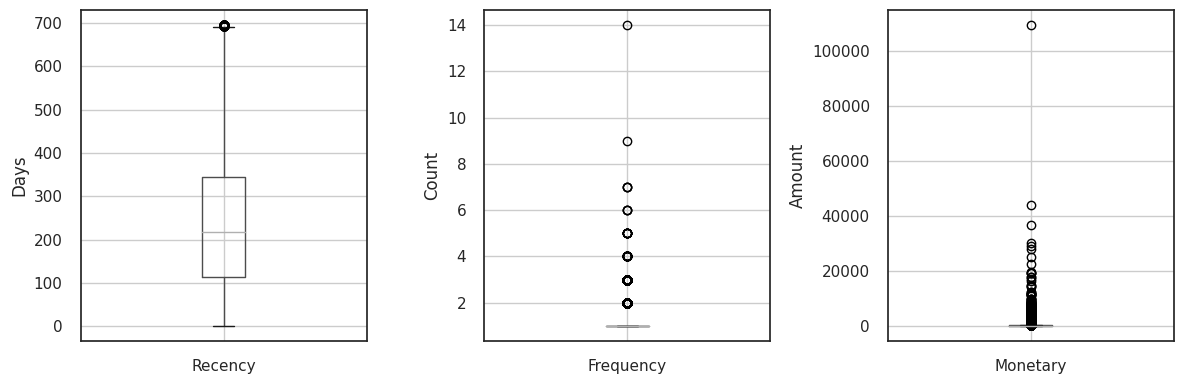

In [69]:
#Visualizations of  RFM box plots
# with columns 'Recency', 'Frequency', and 'Monetary'

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot box plots for each variable
RFM_df.boxplot(column='Recency', ax=axes[0])
#axes[0].set_title('Recency')
axes[0].set_ylabel('Days')

rfm_data.boxplot(column='Frequency', ax=axes[1])
#axes[1].set_title('Frequency')
axes[1].set_ylabel('Count')

rfm_data.boxplot(column='Monetary', ax=axes[2])
#axes[2].set_title('Monetary')
axes[2].set_ylabel('Amount')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


      order_purchase_timestamp  Recency  Frequency  Monetary
0          2016-10-03 16:56:50    694.0        1.0     39.09
1          2016-10-03 21:13:36    694.0        1.0     53.73
2          2016-10-03 22:06:03    694.0        1.0    133.46
3          2016-10-03 22:31:31    694.0        1.0     40.95
4          2016-10-03 22:44:10    694.0        1.0    154.57
...                        ...      ...        ...       ...
91213      2018-08-29 12:25:59      0.0        1.0     73.10
91214      2018-08-29 14:18:23      0.0        1.0   1021.92
91215      2018-08-29 14:18:28      0.0        1.0     61.29
91216      2018-08-29 14:52:00      0.0        1.0     33.23
91217      2018-08-29 15:00:37      0.0        1.0     93.75

[91218 rows x 4 columns]


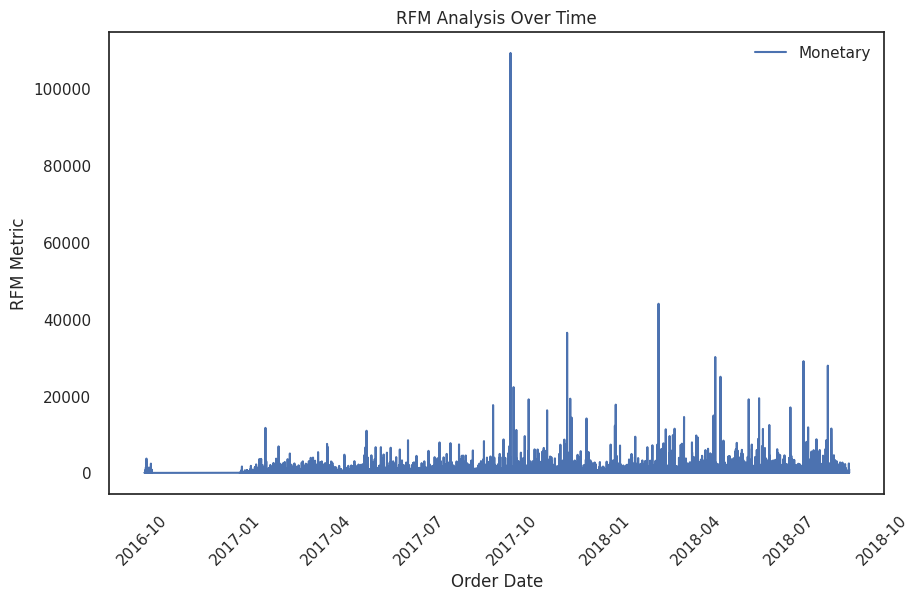

In [70]:


# Visualization of Monetary variable over timer
rfm_df = RFM_df

# Convert 'order_date' column to datetime type
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Calculate the reference date for analysis
reference_date = rfm_df['order_purchase_timestamp'].max()

# Calculate recency, frequency, and monetary values relative to the reference date
rfm_df['Recency'] = (reference_date - rfm_df['order_purchase_timestamp']).dt.days
rfm_df['Frequency'] = rfm_df['Frequency']
rfm_df['Monetary'] = rfm_df['Monetary']

# Perform RFM analysis over time
rfm_over_time = rfm_df.groupby('order_purchase_timestamp').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(rfm_over_time)
# Convert 'order_date' column to datetime type (if not already done)
rfm_over_time['order_purchase_timestamp'] = pd.to_datetime(rfm_over_time['order_purchase_timestamp'])

# Plotting the results
plt.figure(figsize=(10, 6))
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Recency'], label='Recency')
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Frequency'], label='Frequency')
plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Monetary'], label='Monetary')
plt.xlabel('Order Date')
plt.ylabel('RFM Metric')
plt.title('RFM Analysis Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [71]:
# Select specific columns  from RFM dataframe and store them in another DataFrame called selected_columns_rfm
selected_columns_rfm_test = RFM_df[['customer_unique_id','Recency','Frequency','Monetary']]
selected_columns_rfm_test.describe()

,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000
mean,236.054073,1.032859,212.248263
std,152.541250,0.206200,631.325605
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.830000
50%,217.000000,1.000000,112.830000
75%,344.000000,1.000000,202.657500
max,694.000000,14.000000,109312.640000


In [72]:
#Since the  Frequency and Monetary variables have a  high skewed distribution, it would be transformed using  log trnasformation to unskew the data
selected_columns_rfm_test['Monetary']= np.log(selected_columns_rfm_test['Monetary'])
selected_columns_rfm_test['Frequency']= np.log(selected_columns_rfm_test['Frequency'])

<ipython-input-72-d866ef7e33f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_rfm_test['Monetary']= np.log(selected_columns_rfm_test['Monetary'])
<ipython-input-72-d866ef7e33f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_rfm_test['Frequency']= np.log(selected_columns_rfm_test['Frequency'])


<ipython-input-73-bba86e438f46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm_test['Recency'])
<ipython-input-73-bba86e438f46>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm_test['Frequency'])
<ipython-inp

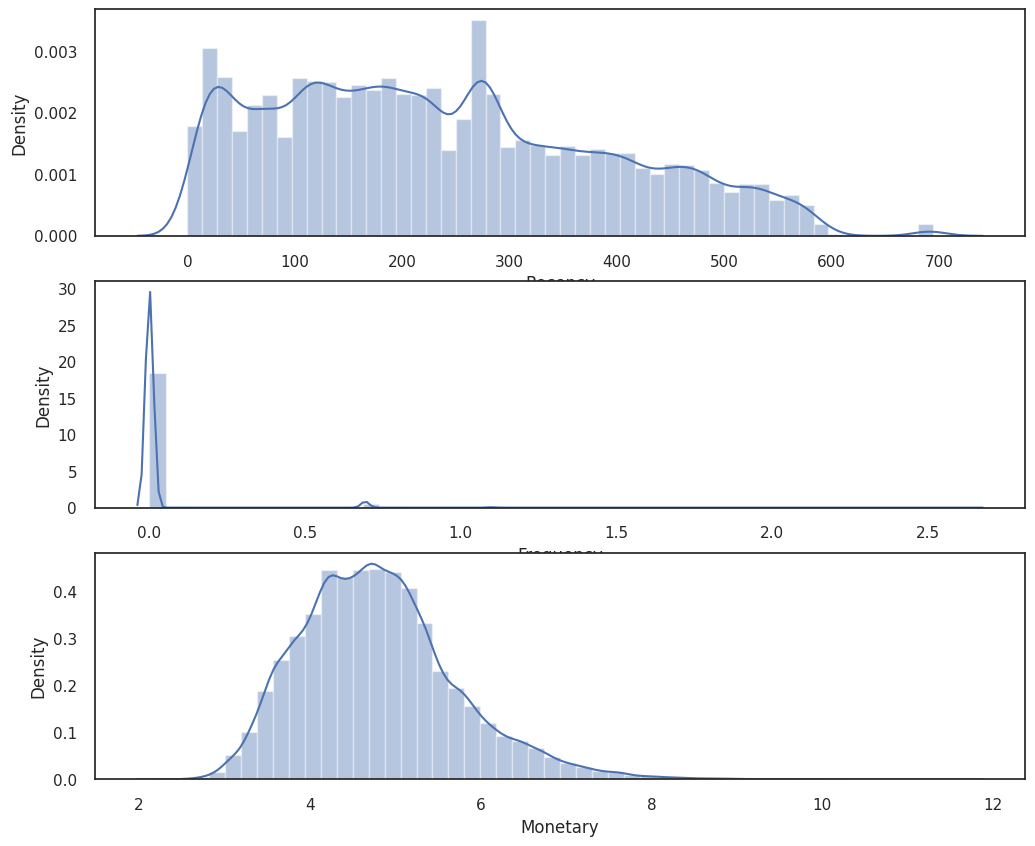

In [73]:
#Plot frequency distributions of transformed  RFM variables
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm_test['Recency'])
plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm_test['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(selected_columns_rfm_test['Monetary'])
plt.show()

In [74]:
# Since there is no difference in the transformation results of Frequency variable, only the  Monetary variable will be transformed
#Select specific columns  from RFM dataframe and store them in another DataFrame called selected_columns_rfm
selected_columns_rfm = RFM_df[['customer_unique_id','Recency','Frequency','Monetary']]
selected_columns_rfm.describe()

,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000
mean,236.054073,1.032859,212.248263
std,152.541250,0.206200,631.325605
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.830000
50%,217.000000,1.000000,112.830000
75%,344.000000,1.000000,202.657500
max,694.000000,14.000000,109312.640000


In [75]:
#Monetary transformation
selected_columns_rfm['Monetary']= np.log(selected_columns_rfm['Monetary'])


<ipython-input-75-801396252005>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_rfm['Monetary']= np.log(selected_columns_rfm['Monetary'])


<ipython-input-76-588ead5f4052>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm['Recency'])
<ipython-input-76-588ead5f4052>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm['Frequency'])
<ipython-input-76-588e

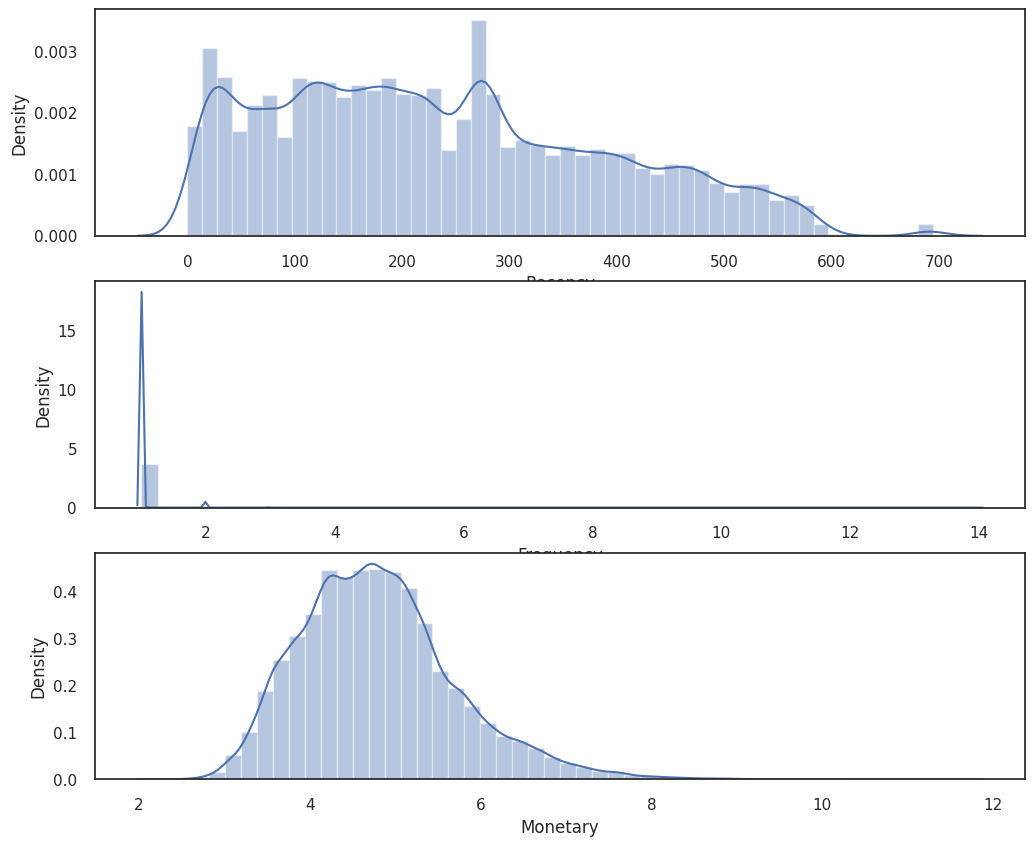

In [76]:
#Plot frequency distributions of transformed  RFM variables
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(selected_columns_rfm['Monetary'])
plt.show()

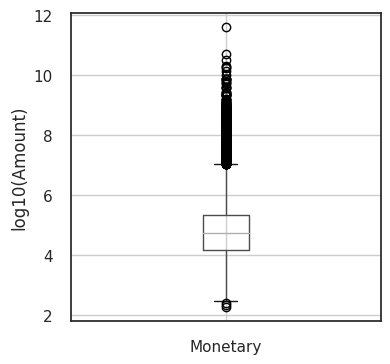

In [77]:
#Display boxplot of transformed Monetary variable
# Create a single axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the boxplot on that axis
selected_columns_rfm.boxplot(column='Monetary', ax=ax)
ax.set_ylabel('log10(Amount)')

# Display the plot
plt.show()


### 2.3 OUTLIER ANALYSIS

In [78]:
#In this section the RFM variables that were transformed are copied in a new dataframe for the outlier analysis
RFM_log_trans=selected_columns_rfm.copy()

In [79]:
#OUTLIERS FUNCTIONS

# Function: Detect outliers using IQR method
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)
#Function: exclude outliers from Monetary column using IQR method and store in a cluster
def erase_outliers_monetary(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outliers_df = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].copy()
    outliers_df['Cluster'] =4

    df_out = df_in.drop(outliers_df.index)

    print("Number of outliers in {} column: {}".format(col_name, len(outliers_df)))
    print("Indexes:", outliers_df.index)

    return df_out, outliers_df
#Function: exclude outliers from Recency column using IQR method and store in a cluster
def erase_outliers_recency(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outliers_df = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].copy()
    outliers_df['Cluster'] =3

    df_out = df_in.drop(outliers_df.index)

    print("Number of outliers in {} column: {}".format(col_name, len(outliers_df)))
    print("Indexes:", outliers_df.index)

    return df_out, outliers_df

In [80]:
#Outlier analysis in the untransformed RFM variables
for i in ['Recency','Frequency',"Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  149
Indexes:  Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=149)
****************************************
Number of outliers in Frequency column:  2705
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   433,   462,   464,
              495,
            ...
            90855, 90869, 90925, 91025, 91029, 91096, 91187, 91288, 91304,
            91407],
           dtype='int64', length=2705)
****************************************
Number of outliers in Monetary column:  8940
Indexes:  Int64Index([    7,    18,    22,    25,    52,    56,    58,    70,    74,
               77,
            ...
            91332, 91359, 91361, 91405, 91416, 91418, 91424, 91439, 91441,
            91445],
           dtype='int64', length=8940)
***********************

In [81]:
#Outlier analysis in the transformed RFM variables
for i in ['Recency','Frequency',"Monetary"]:
    num_outlier(RFM_log_trans, i)
    print("*"*40)

Number of outliers in Recency column:  149
Indexes:  Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=149)
****************************************
Number of outliers in Frequency column:  2705
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   433,   462,   464,
              495,
            ...
            90855, 90869, 90925, 91025, 91029, 91096, 91187, 91288, 91304,
            91407],
           dtype='int64', length=2705)
****************************************
Number of outliers in Monetary column:  1806
Indexes:  Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91111, 91135, 91183, 91227, 91248, 91278, 91298, 91359, 91439,
            91445],
           dtype='int64', length=1806)
***********************

In [82]:
#Remove outliers of Monetary variable in a separate dataframe
# RFM_log_trans_wo will contain the input DataFrame with outliers removed
# 'outliers' will contain the removed outliers in a separate DataFrame
RFM_log_trans_wo, outliers = erase_outliers_monetary(RFM_log_trans, 'Monetary')



Number of outliers in Monetary column: 1806
Indexes: Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91111, 91135, 91183, 91227, 91248, 91278, 91298, 91359, 91439,
            91445],
           dtype='int64', length=1806)


In [83]:
#Remove outliers of the Recency variable in a separate dataframe
# RFM_log_trans_wo will contain the input DataFrame with outliers removed
# 'outliers' will contain the removed outliers in a separate DataFrame
RFM_log_trans_wo, outliers2 = erase_outliers_recency(RFM_log_trans_wo, 'Recency')

Number of outliers in Recency column: 146
Indexes: Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=146)


In [84]:
#Monetary outliers: stored in a new cluster
outliers.describe()

,Recency,Frequency,Monetary,Cluster
count,1806.000000,1806.000000,1806.000000,1806.0
mean,232.385382,1.142857,7.589553,4.0
std,152.708325,0.522694,0.580449,0.0
min,0.000000,1.000000,2.260721,4.0
25%,108.000000,1.000000,7.206477,4.0
50%,209.000000,1.000000,7.433856,4.0
75%,340.000000,1.000000,7.795502,4.0
max,693.000000,9.000000,11.601967,4.0


In [85]:
#Recency outliers: stored in a new cluster
outliers2.describe()

,Recency,Frequency,Monetary,Cluster
count,146.000000,146.000000,146.000000,146.0
mean,692.404110,1.006849,4.890681,3.0
std,1.054244,0.082761,0.900384,0.0
min,691.000000,1.000000,2.924236,3.0
25%,691.000000,1.000000,4.268461,3.0
50%,693.000000,1.000000,4.784235,3.0
75%,693.000000,1.000000,5.533139,3.0
max,694.000000,2.000000,6.994089,3.0


In [86]:
#Outlier analysis after excluding the flagged outliers
for i in ['Recency','Frequency',"Monetary"]:
    num_outlier(RFM_log_trans_wo, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2520
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   462,   464,   495,
              538,
            ...
            90817, 90855, 90869, 91025, 91029, 91096, 91187, 91288, 91304,
            91407],
           dtype='int64', length=2520)
****************************************
Number of outliers in Monetary column:  288
Indexes:  Int64Index([   77,   153,  1613,  1638,  1772,  2488,  2498,  2990,  3138,
             3243,
            ...
            88985, 89196, 89259, 89391, 89869, 89906, 90125, 90538, 90742,
            91022],
           dtype='int64', length=288)
****************************************


<ipython-input-87-0635dfc41c01>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(outliers['Recency'])
<ipython-input-87-0635dfc41c01>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(outliers['Frequency'])
<ipython-input-87-0635dfc41c01>:6: UserWarning

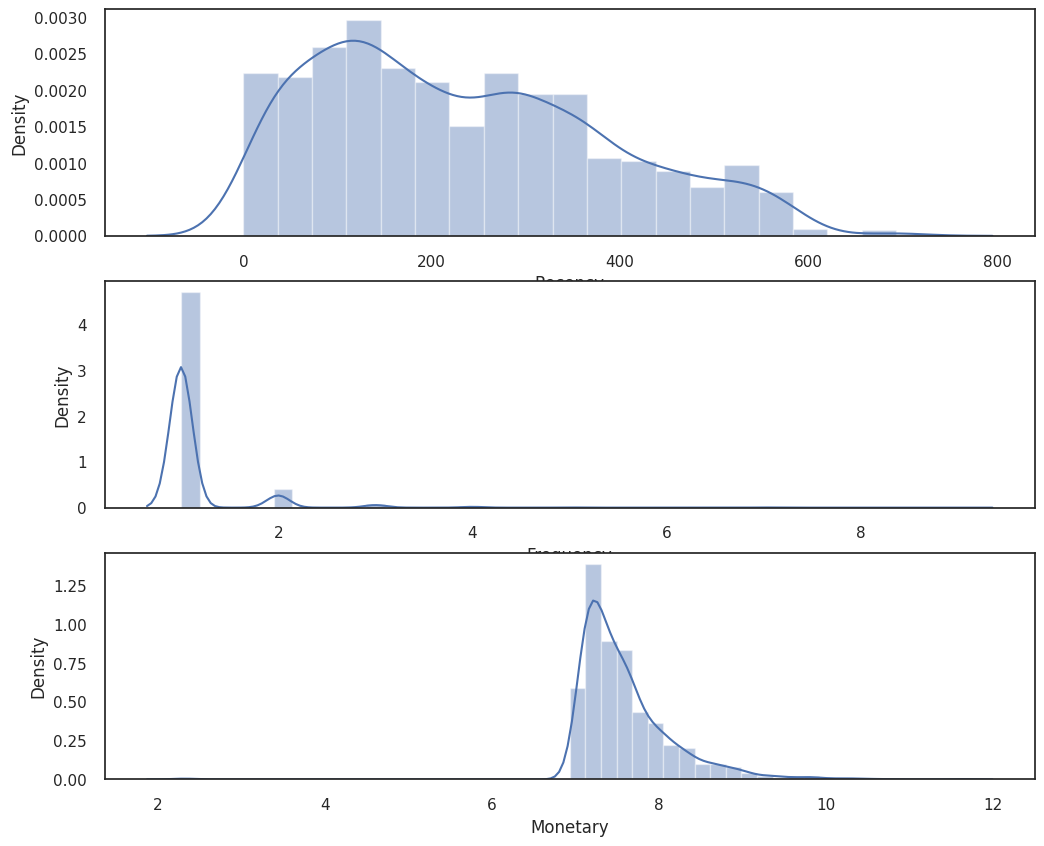

In [87]:
# Monetary outliers distribution

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(outliers['Recency'])
plt.subplot(3, 1, 2); sns.distplot(outliers['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(outliers['Monetary'])
plt.show()

<ipython-input-88-17b9fbad555e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(outliers2['Recency'])
<ipython-input-88-17b9fbad555e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(outliers2['Frequency'])
<ipython-input-88-17b9fbad555e>:6: UserWarni

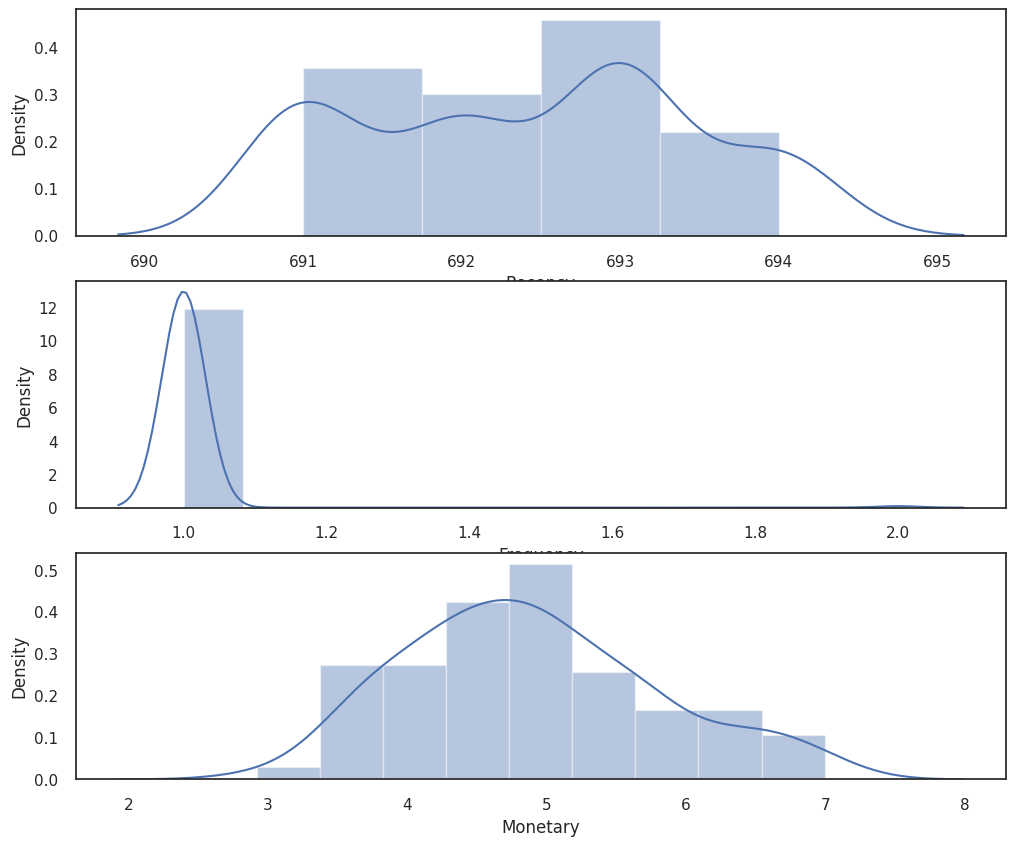

In [88]:
# Recency outliers distribution

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(outliers2['Recency'])
plt.subplot(3, 1, 2); sns.distplot(outliers2['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(outliers2['Monetary'])
plt.show()

### 2.4 SCALING

In [89]:
#Scale the RFM variables using MIN MAX scaler
# Select the columns to be scaled
columns_to_scale = ['Recency', 'Frequency', 'Monetary']

# Create a new DataFrame with the selected columns
RFM_log_trans_wo_scaled = RFM_log_trans_wo[['customer_unique_id'] + columns_to_scale].copy()

# Apply min-max scaling to the selected columns
scaler = MinMaxScaler()
RFM_log_trans_wo_scaled[columns_to_scale] = scaler.fit_transform(RFM_log_trans_wo_scaled[columns_to_scale])

# Print the updated RFM_log_trans_wo_scaled DataFrame
print(RFM_log_trans_wo_scaled)



                     customer_unique_id   Recency  Frequency  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2  0.160870        0.0  0.544907
1      0000b849f77a49e4a4ce2b2a4ca5be3f  0.165217        0.0  0.184994
2      0000f46a3911fa3c0805444483337064  0.776812        0.0  0.436380
3      0000f6ccb0745a6a4b88665a16c9f078  0.463768        0.0  0.287954
4      0004aac84e0df4da2b147fca70cf8255  0.415942        0.0  0.616250
...                                 ...       ...        ...       ...
91444  fffb09418989a0dbff854a28163e47c6  0.368116        0.0  0.400601
91446  fffea47cd6d3cc0a88bd621562a9d061  0.378261        0.0  0.432196
91447  ffff371b4d645b6ecea244b27531430a  0.821739        0.0  0.494256
91448  ffff5962728ec6157033ef9805bacc48  0.171014        0.0  0.531924
91449  ffffd2657e2aad2907e67c3e9daecbeb  0.700000        0.0  0.395784

[89498 rows x 4 columns]


## CUSTOMER SEGMENTATION

### 2.5 CLUSTERING


In [90]:
#ELBOW ANALYSIS FUNCTION
#KMEANS

def elbow_method_kmeans(X, k_values):
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='random')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(k_values, distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.xticks(k_values)  # Set x-axis ticks to match k_values
    plt.show()

#KMEANS++
def elbow_method_kmeans_plusplus(X, k_values):
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(k_values, distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()



#SILHOUTTE ANALYSIS FUNCTION
#K MEANS


import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

def perform_kmeans_analysis(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    range_n_clusters = list(range(2, 10))  # Update the range from 2 to 10

    silhouette_scores = []
    num_clusters = []

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

        silhouette_scores.append(silhouette_avg)
        num_clusters.append(n_clusters)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.figure()
    plt.plot(num_clusters, silhouette_scores, 'bo-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score vs. Number of clusters")
    plt.show()


#KMEANS++
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

def perform_rfm_analysis_updated(X):
    range_n_clusters = list(range(2, 10))  # Update the range from 2 to 10

    silhouette_scores = []
    num_clusters = []

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

        silhouette_scores.append(silhouette_avg)
        num_clusters.append(n_clusters)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.figure()
    plt.plot(num_clusters, silhouette_scores, 'bo-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score vs. Number of clusters")
    plt.show()




#### 2.5.1 K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

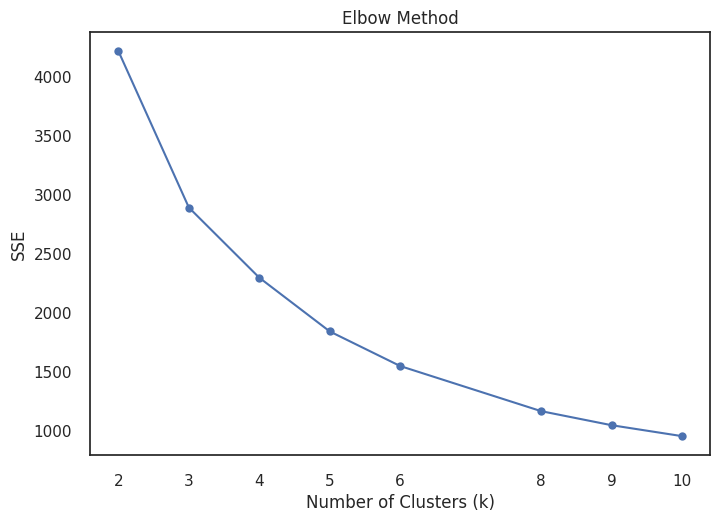

In [91]:
#Elbow Analysis
k_values = [2, 3, 4, 5, 6, 8, 9, 10]
elbow_method_kmeans(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']], k_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is: 0.3808989344567229


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is: 0.3603803032002458


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is: 0.33875036559787025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is: 0.3372303437032858


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is: 0.3424519982968354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is: 0.3395505539191904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is: 0.33631161604140997


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is: 0.33454067208778043


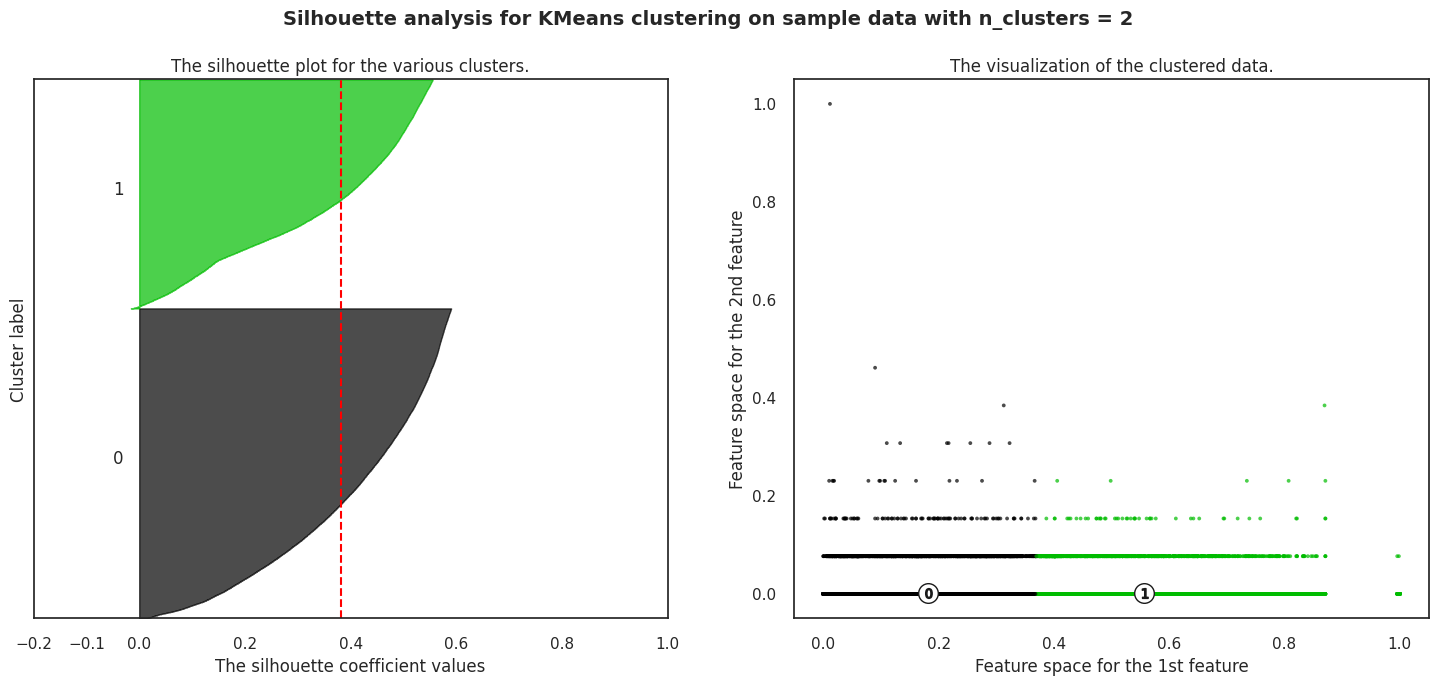

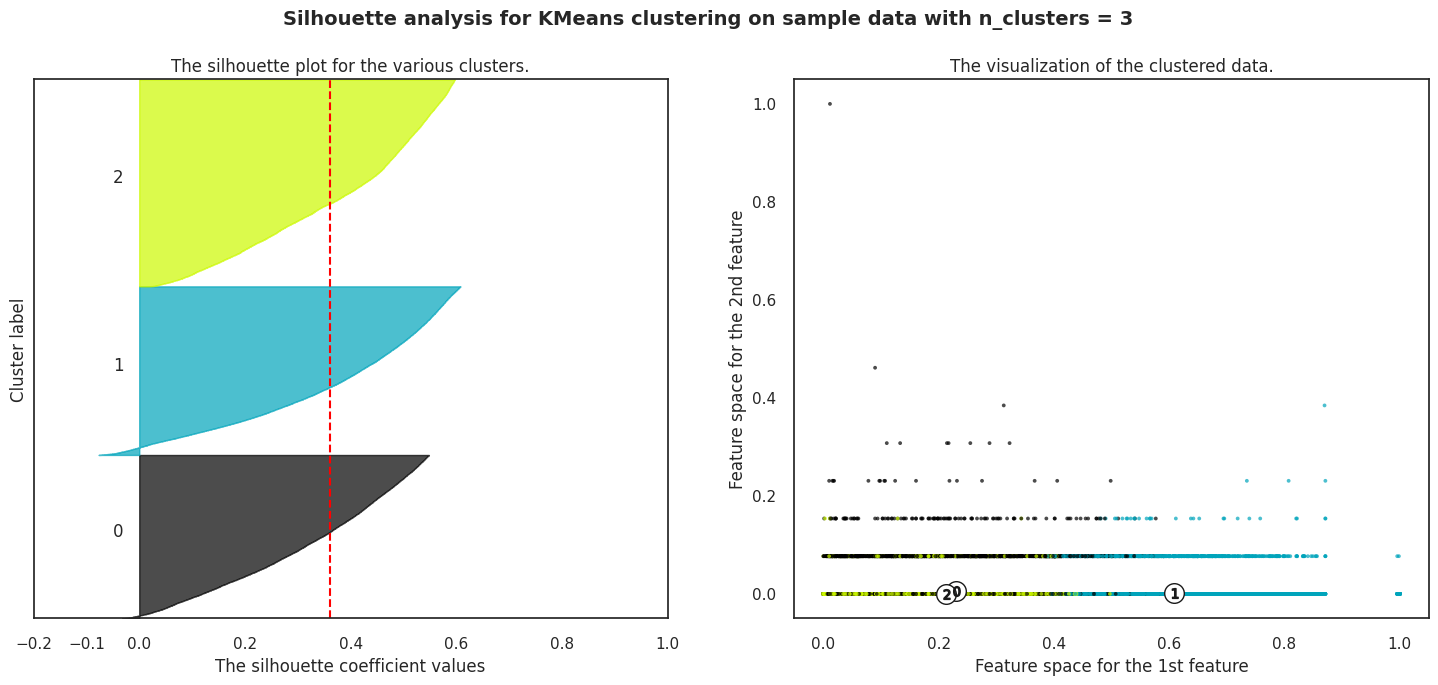

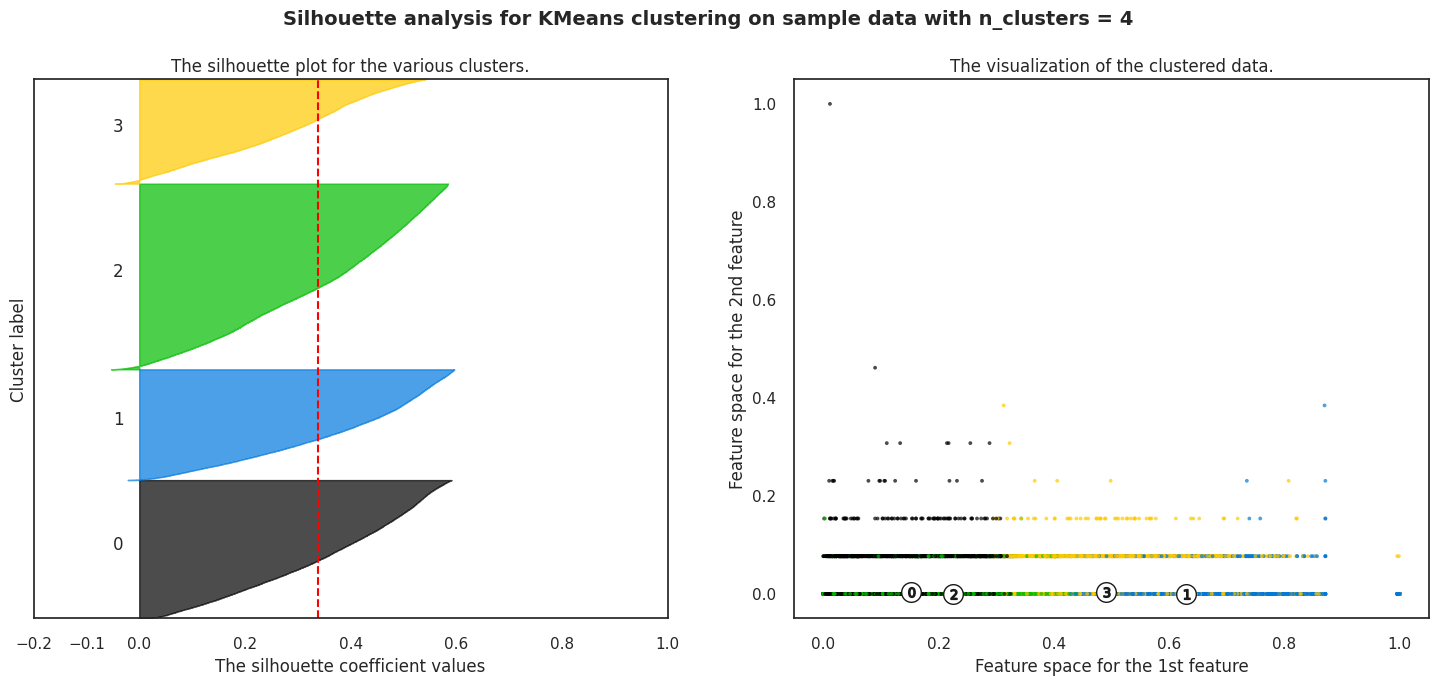

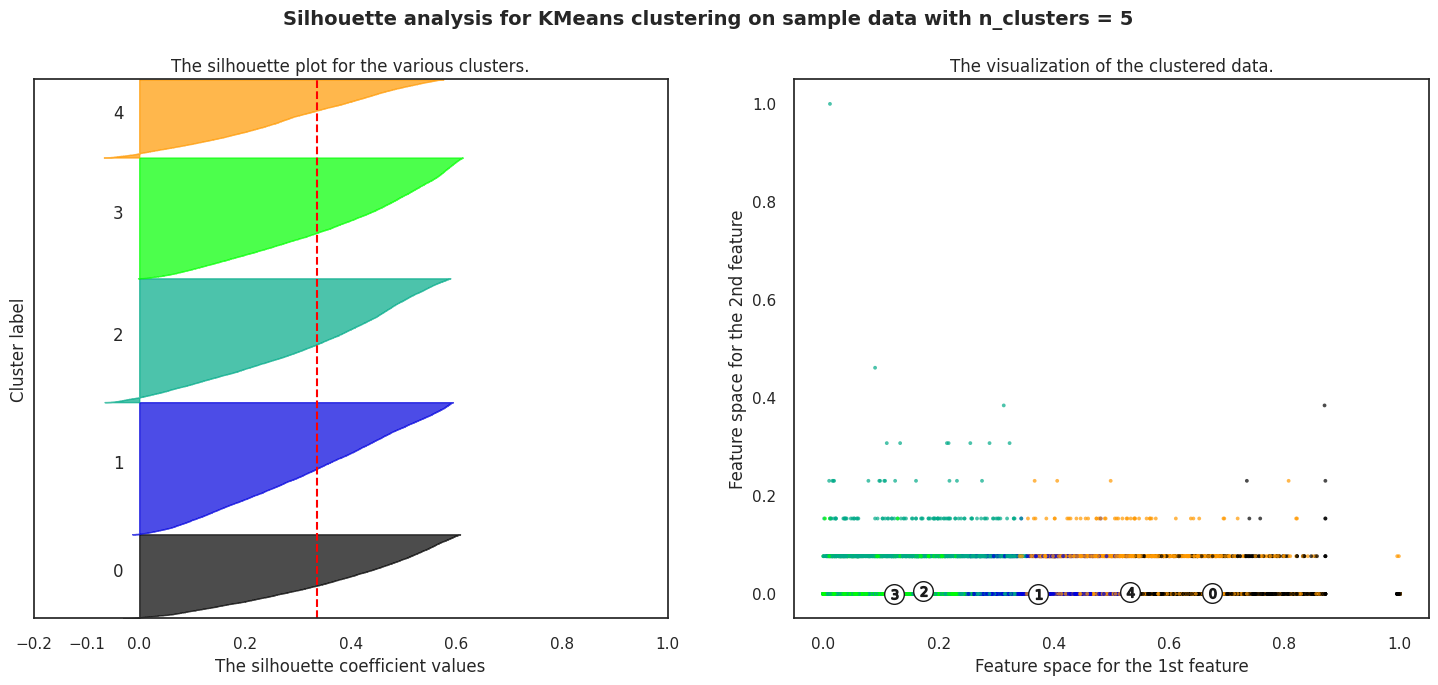

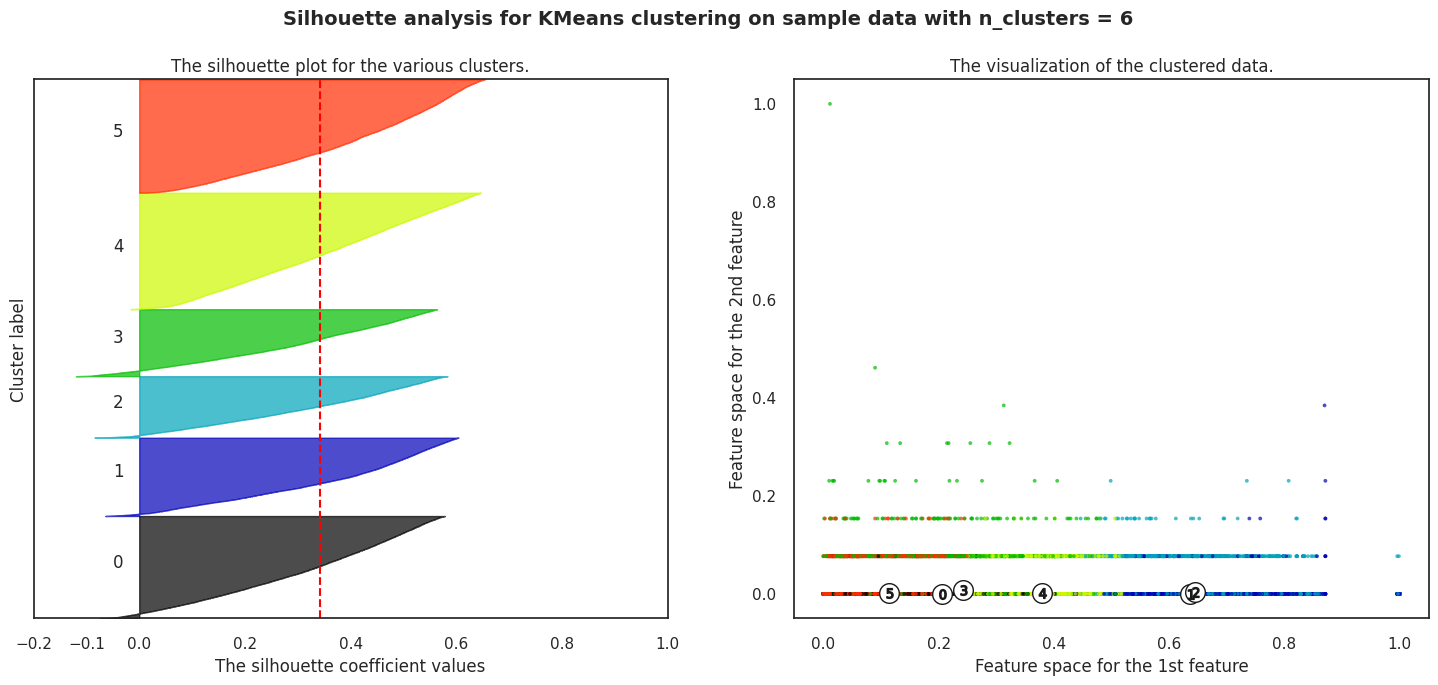

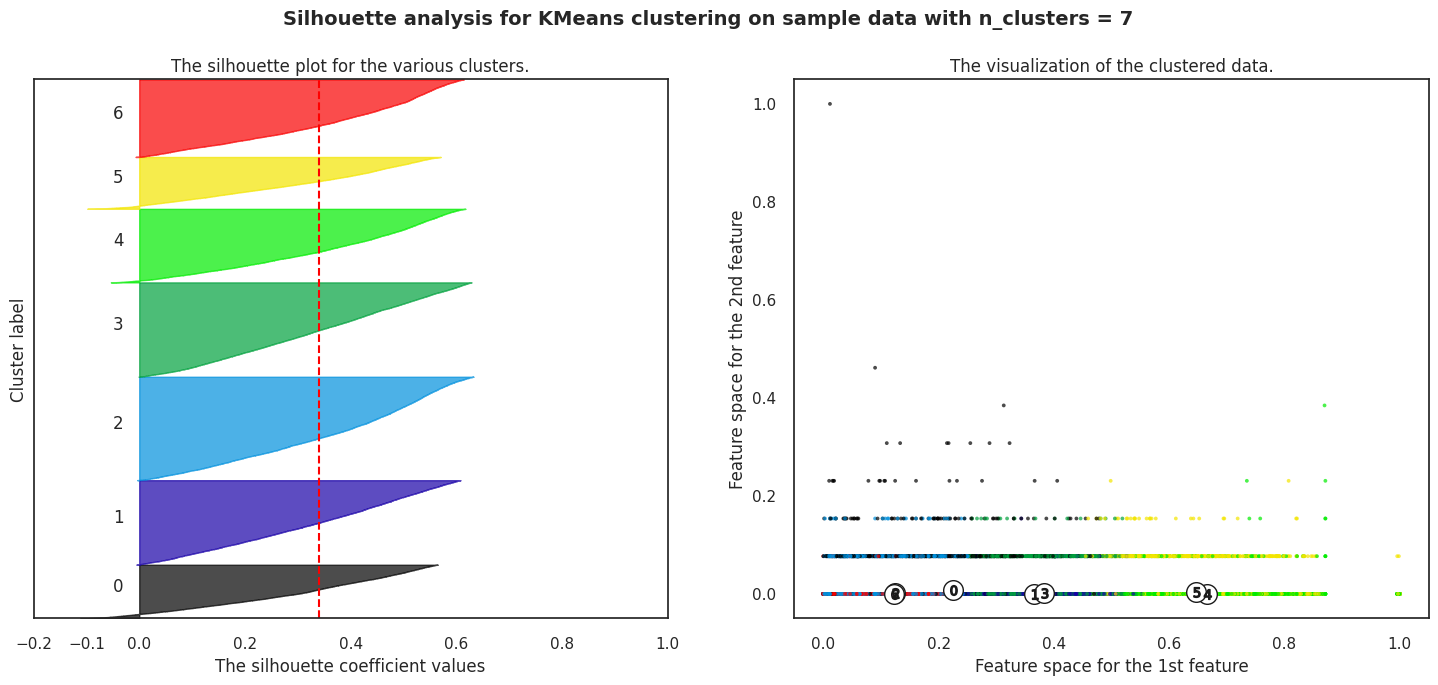

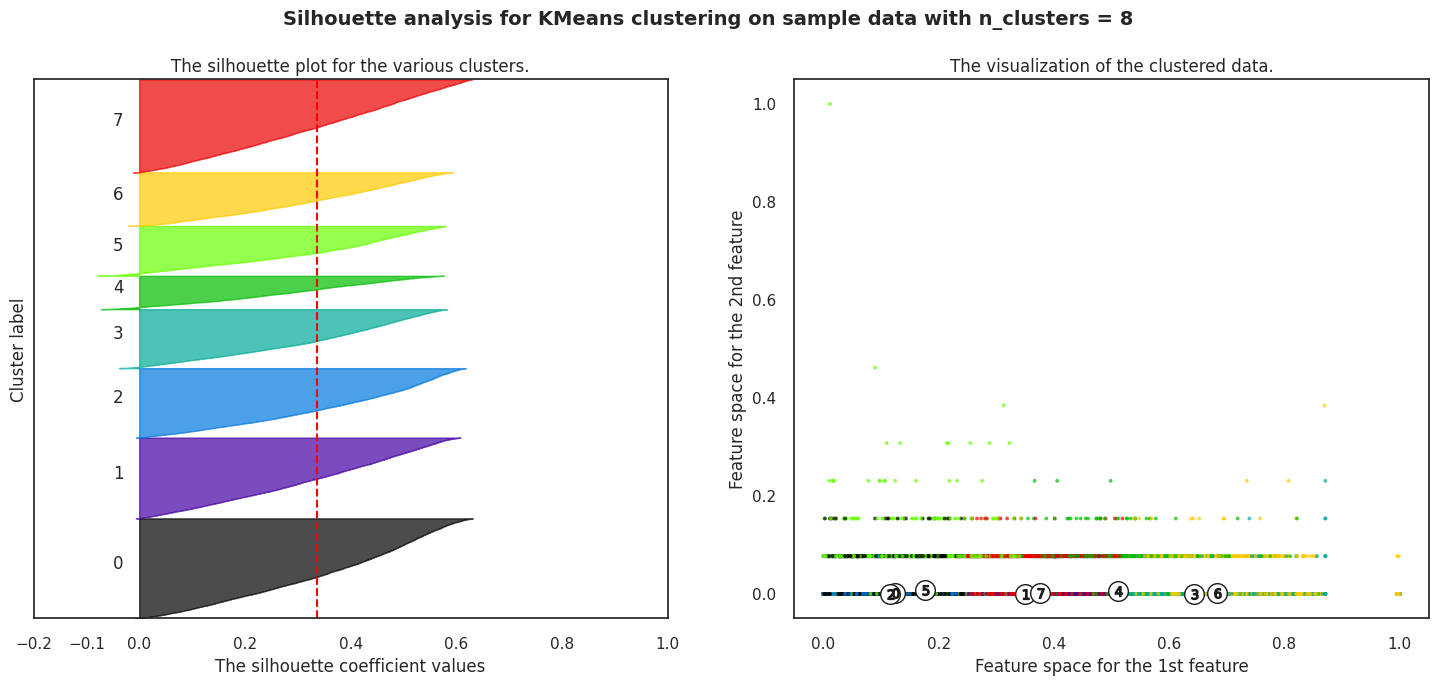

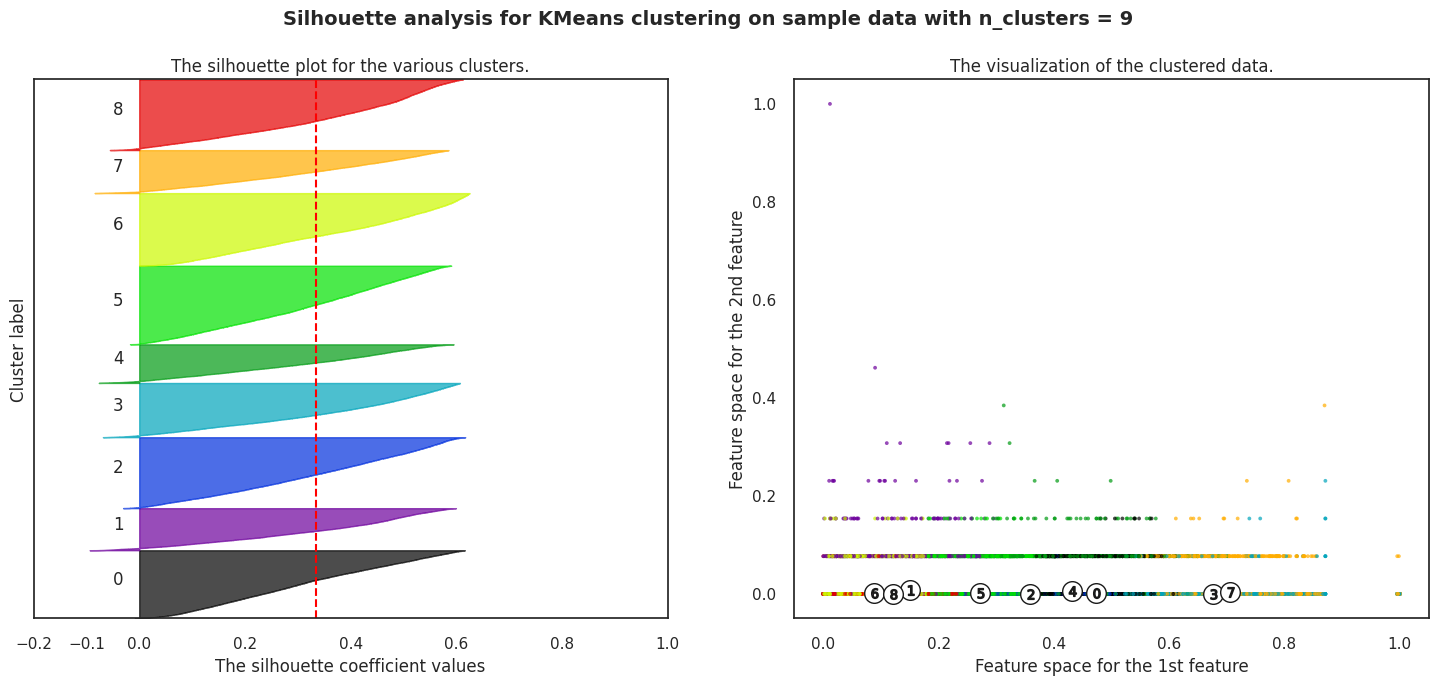

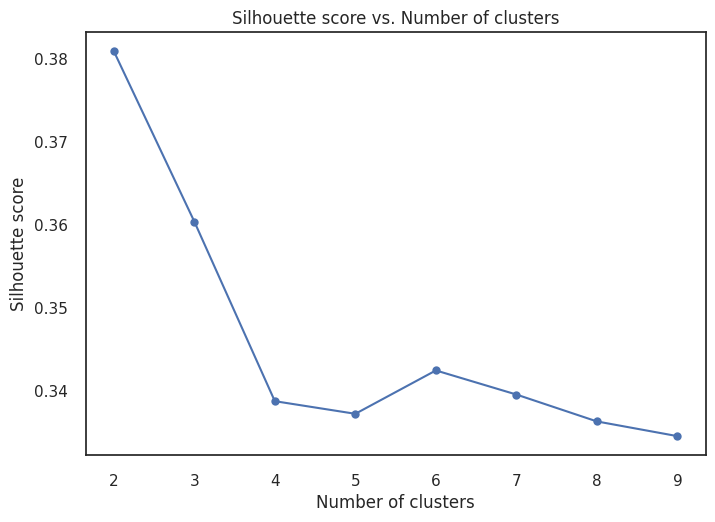

In [92]:
## WITH STANDARD SCALING
perform_kmeans_analysis(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])

####  2.5.2 K-MEANS++

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

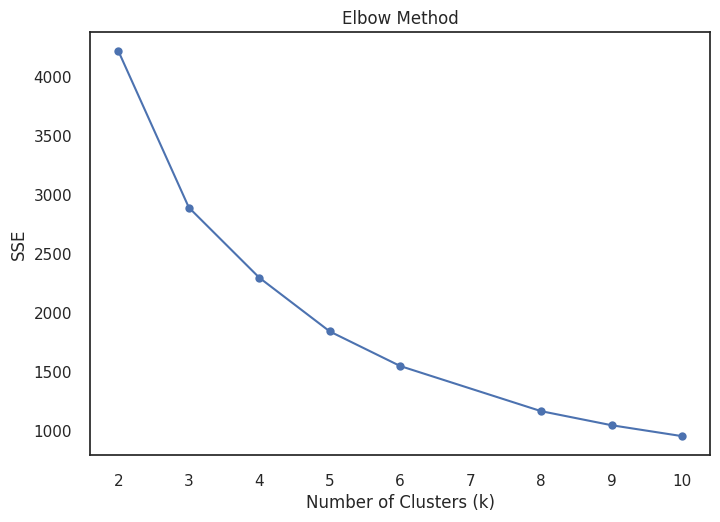

In [93]:
#Elbow Analysis
k_values = [2, 3, 4, 5, 6, 8, 9, 10]
elbow_method_kmeans_plusplus(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']], k_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is: 0.3809064444844309


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is: 0.36040439174287037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is: 0.3387556756006843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is: 0.3372327891779884


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is: 0.34212205840557086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is: 0.3391020695395668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is: 0.33597707398029913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is: 0.3344405858090937


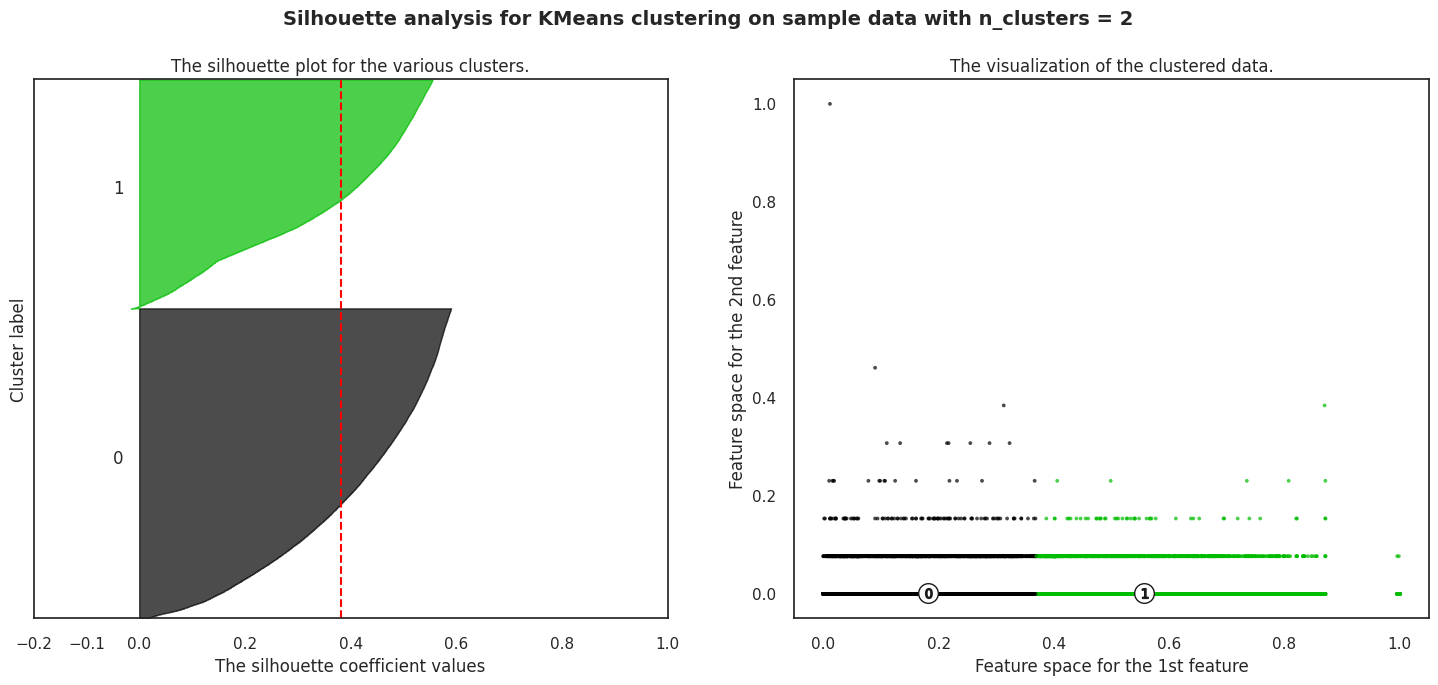

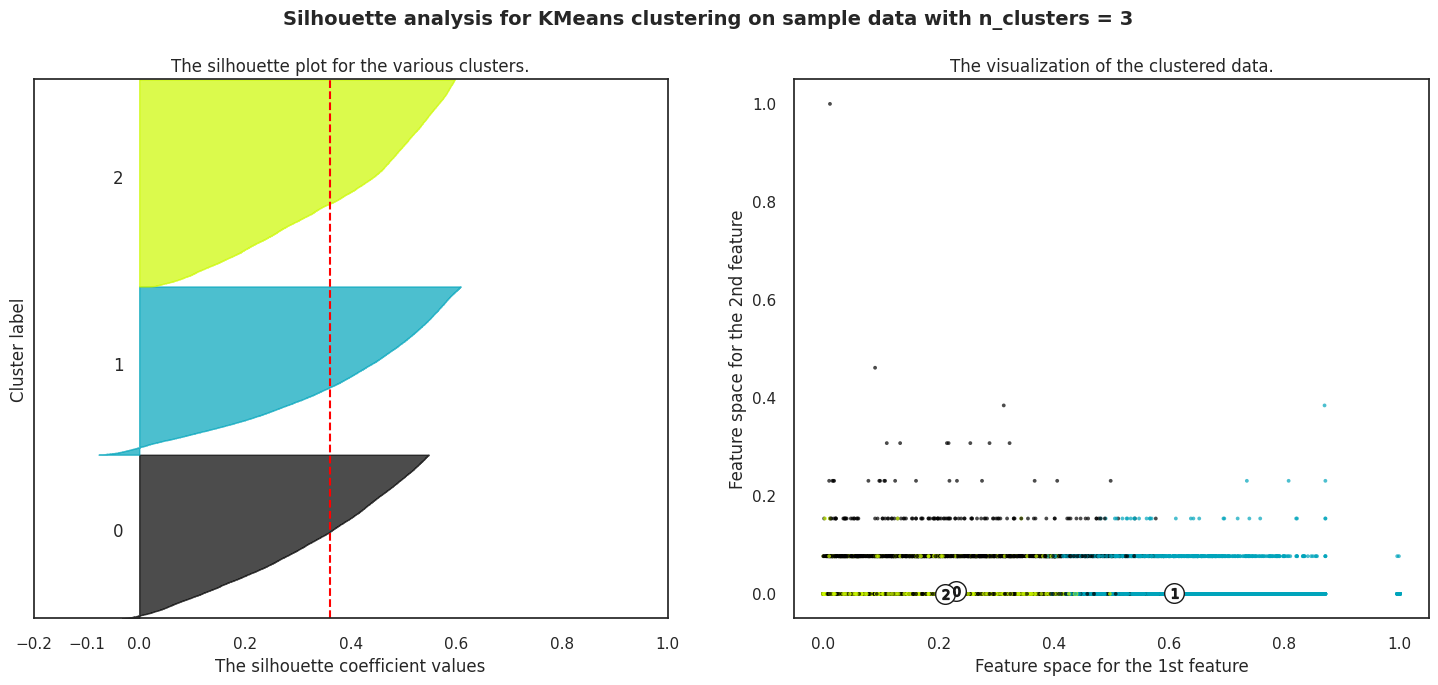

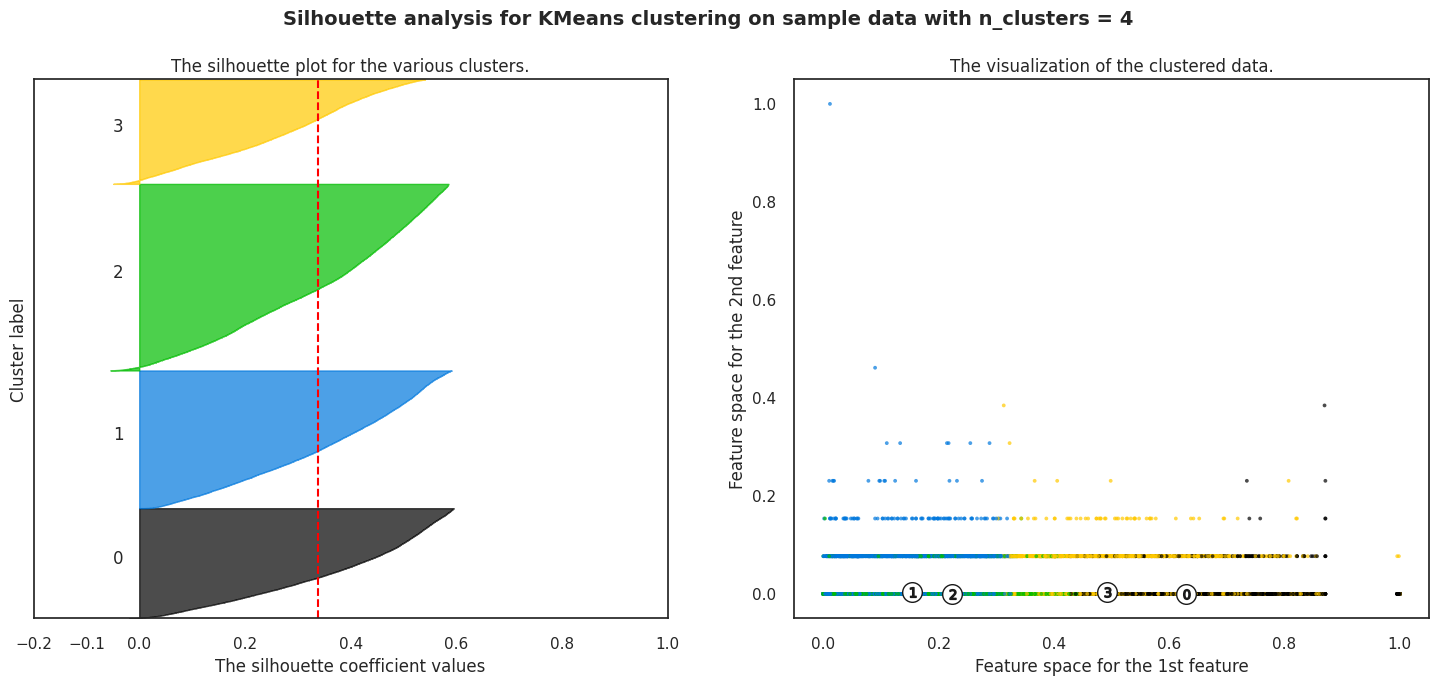

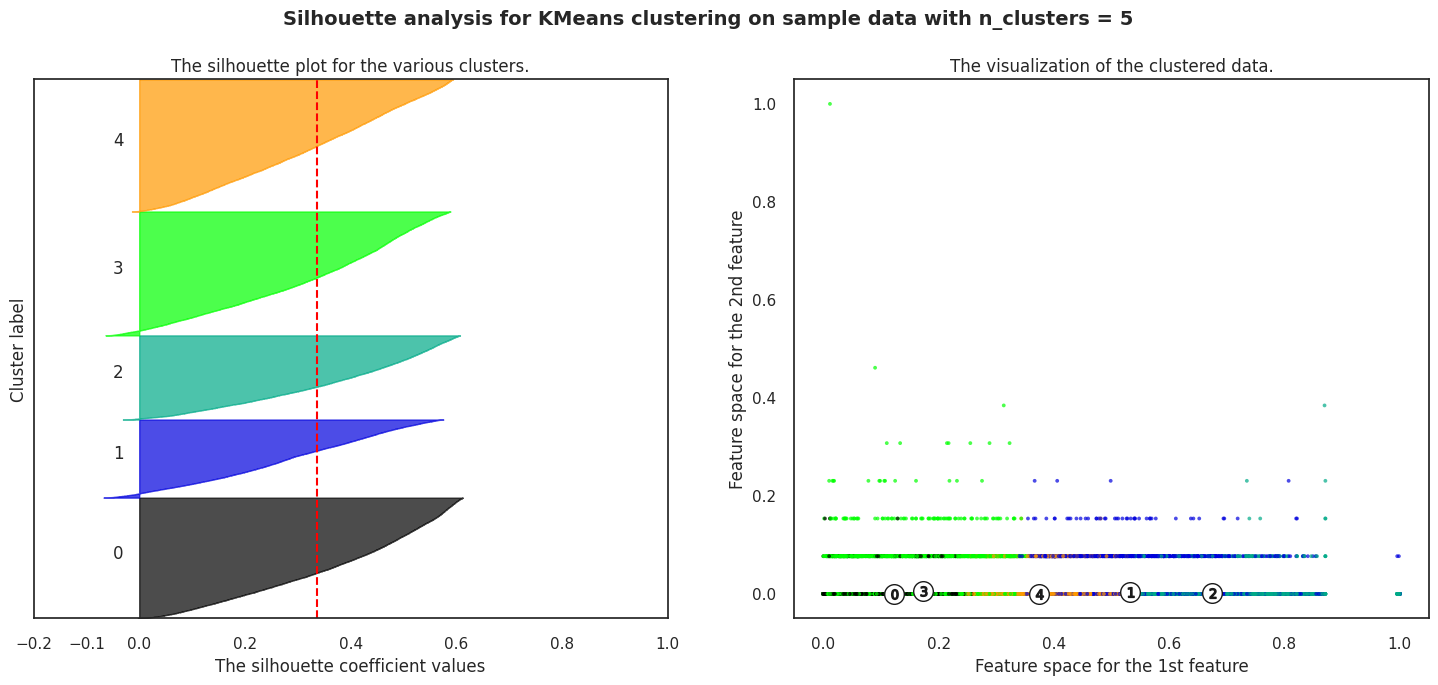

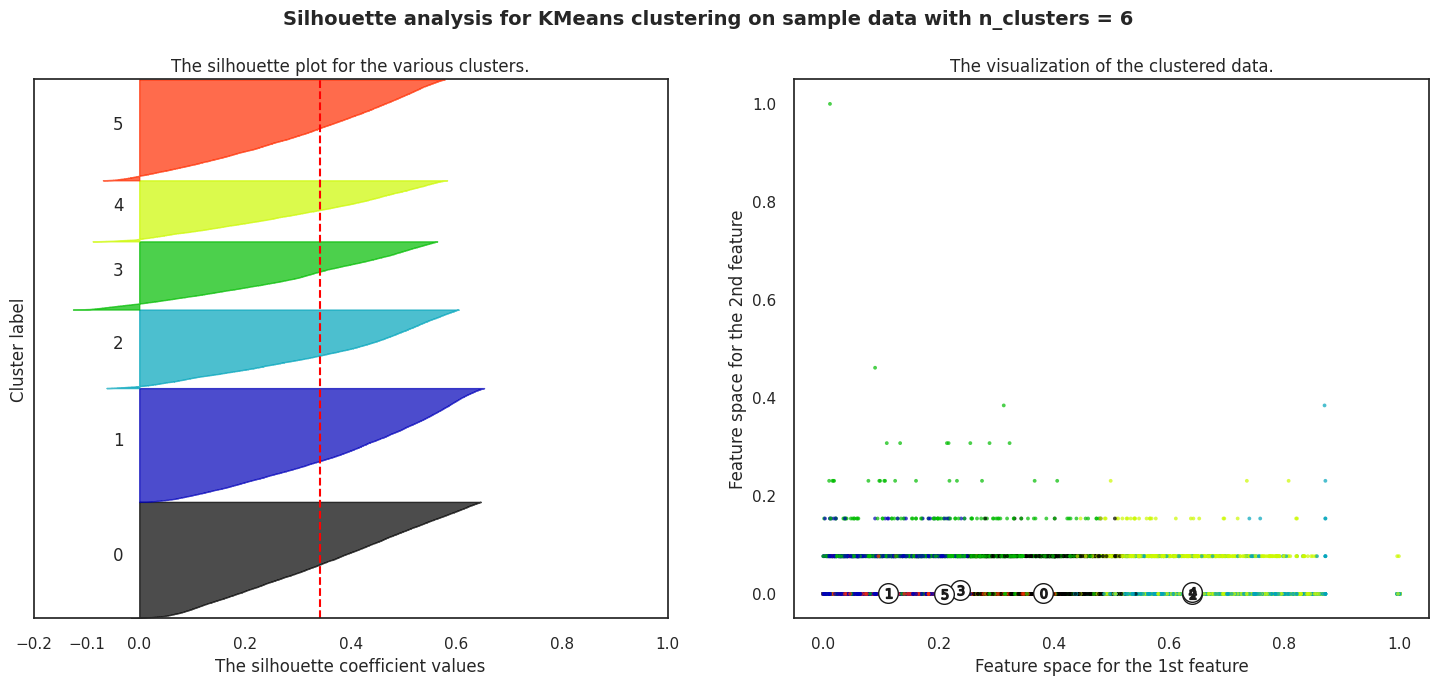

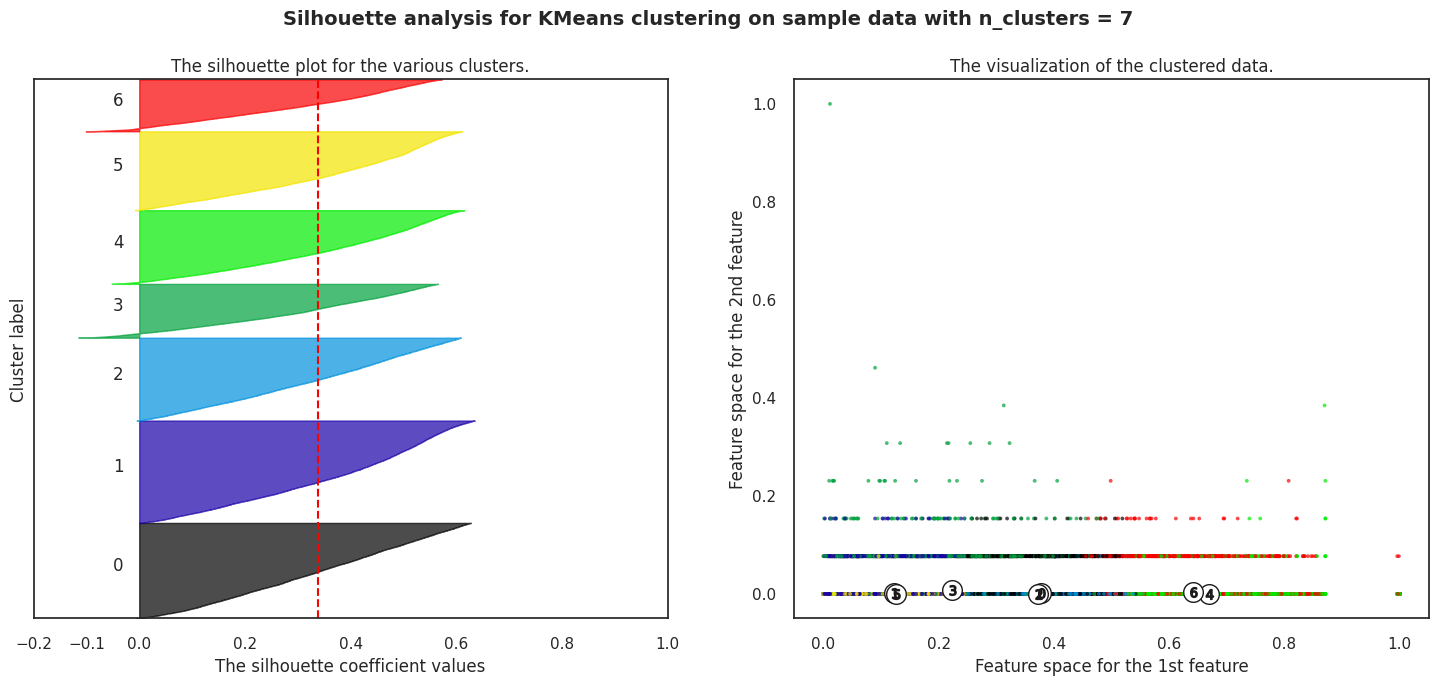

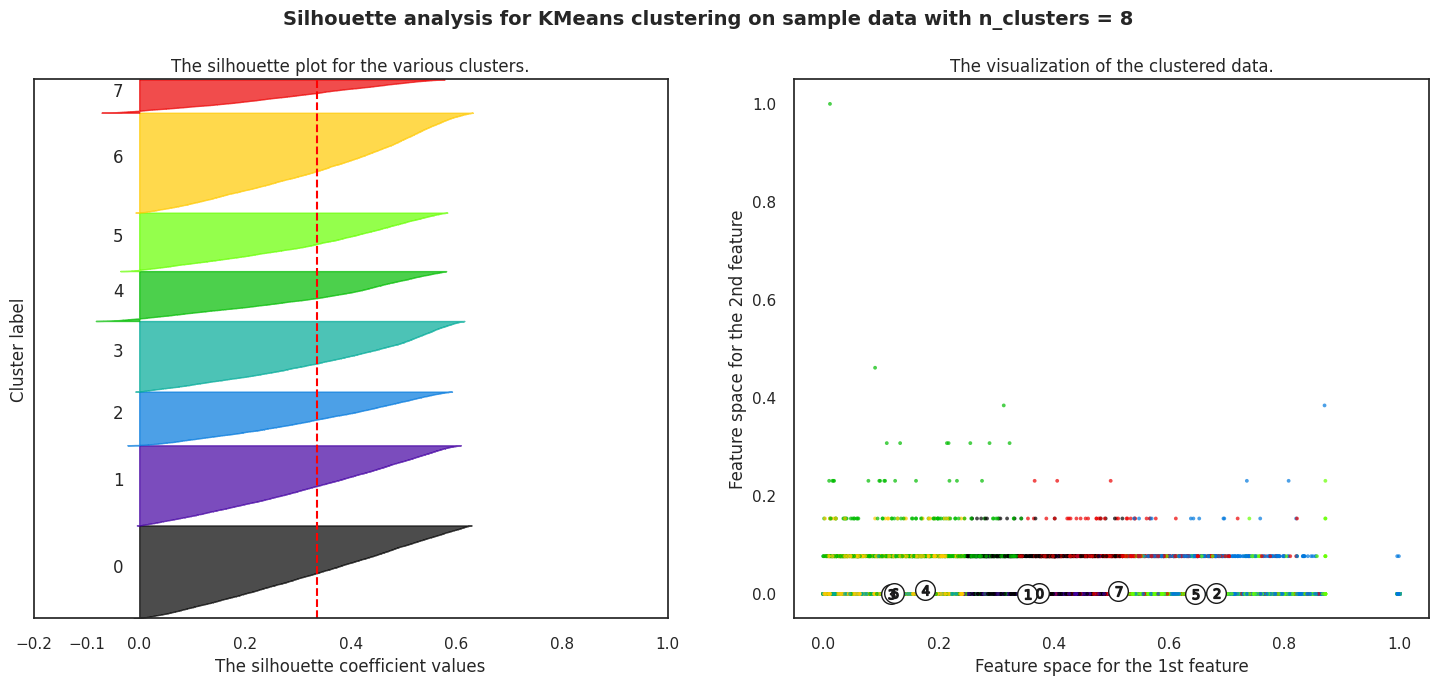

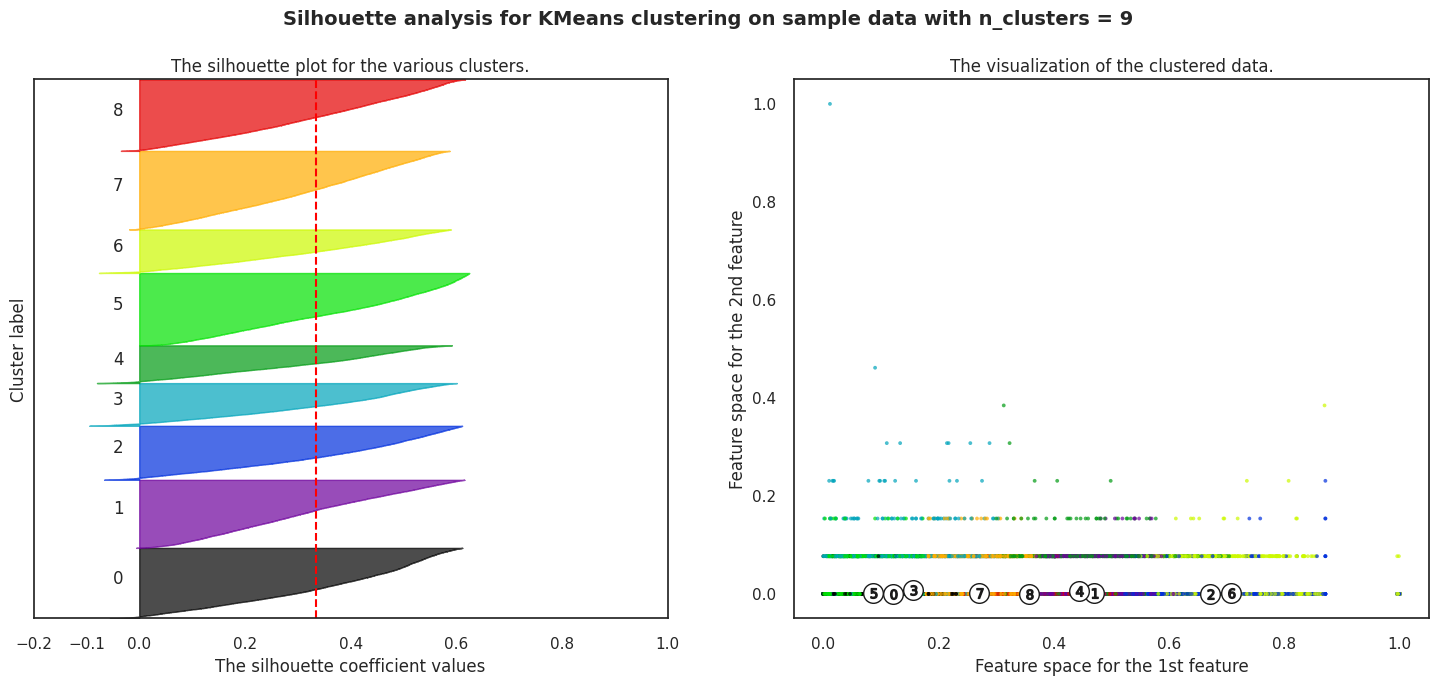

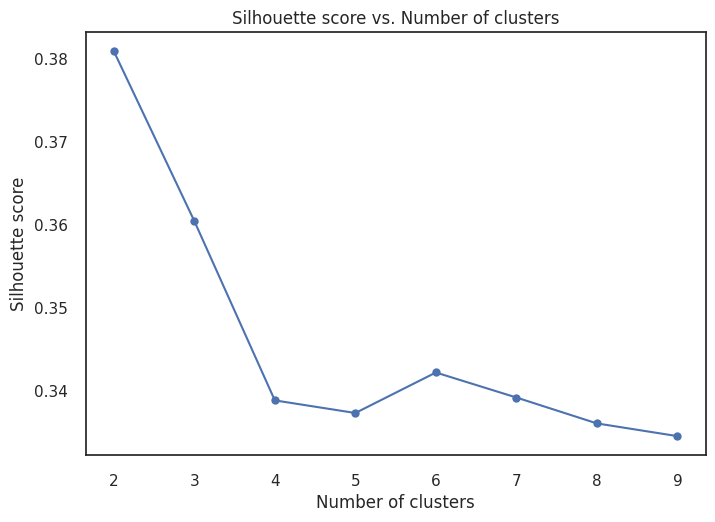

In [94]:
#Perform Silhouette analysis
perform_rfm_analysis_updated(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])

# 3) OUTPUT

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


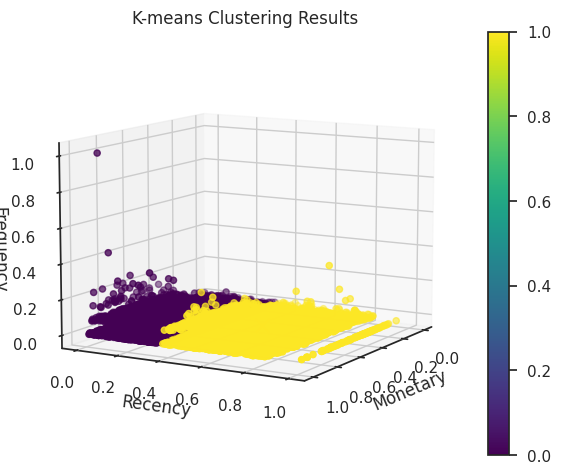

                     customer_unique_id   Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2  0.160870        0.0  0.544907   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  0.165217        0.0  0.184994   
2      0000f46a3911fa3c0805444483337064  0.776812        0.0  0.436380   
3      0000f6ccb0745a6a4b88665a16c9f078  0.463768        0.0  0.287954   
4      0004aac84e0df4da2b147fca70cf8255  0.415942        0.0  0.616250   
...                                 ...       ...        ...       ...   
91444  fffb09418989a0dbff854a28163e47c6  0.368116        0.0  0.400601   
91446  fffea47cd6d3cc0a88bd621562a9d061  0.378261        0.0  0.432196   
91447  ffff371b4d645b6ecea244b27531430a  0.821739        0.0  0.494256   
91448  ffff5962728ec6157033ef9805bacc48  0.171014        0.0  0.531924   
91449  ffffd2657e2aad2907e67c3e9daecbeb  0.700000        0.0  0.395784   

       Cluster  
0            0  
1            0  
2            1  
3            1  
4            1  
...      

In [95]:
#Perform Clustering analysis with KMEANS++ and k number of clusters

# Perform k-means clustering algorithm with K-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])

# Calculate cluster centers and set cluster labels.
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Set the parameters for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RFM_log_trans_wo_scaled['Monetary'], RFM_log_trans_wo_scaled['Recency'], RFM_log_trans_wo_scaled['Frequency'], c=cluster_labels, cmap='viridis')
ax.scatter(cluster_centers[:, 2], cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)

# Set labels and title
ax.set_xlabel('Monetary')
ax.set_ylabel('Recency')
ax.set_zlabel('Frequency')
ax.set_title('K-means Clustering Results')

# Set the viewing angle
ax.view_init(azim=30, elev=10)  # Adjust the azim and elev angles to change the viewing angle
plt.colorbar(scatter)

# Display the plot
plt.show()

# Add the cluster_labels as a new column in the DataFrame
RFM_log_trans_wo_scaled['Cluster'] = cluster_labels

# Display the updated DataFrame
print(RFM_log_trans_wo_scaled)


In [96]:
#Checking the cluster labels of each customer
print(RFM_log_trans_wo_scaled)

                     customer_unique_id   Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2  0.160870        0.0  0.544907   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  0.165217        0.0  0.184994   
2      0000f46a3911fa3c0805444483337064  0.776812        0.0  0.436380   
3      0000f6ccb0745a6a4b88665a16c9f078  0.463768        0.0  0.287954   
4      0004aac84e0df4da2b147fca70cf8255  0.415942        0.0  0.616250   
...                                 ...       ...        ...       ...   
91444  fffb09418989a0dbff854a28163e47c6  0.368116        0.0  0.400601   
91446  fffea47cd6d3cc0a88bd621562a9d061  0.378261        0.0  0.432196   
91447  ffff371b4d645b6ecea244b27531430a  0.821739        0.0  0.494256   
91448  ffff5962728ec6157033ef9805bacc48  0.171014        0.0  0.531924   
91449  ffffd2657e2aad2907e67c3e9daecbeb  0.700000        0.0  0.395784   

       Cluster  
0            0  
1            0  
2            1  
3            1  
4            1  
...      

In [97]:
#Back transform the the RFM variable to their original scale
RFM_log_trans_wo_scaled = RFM_log_trans_wo_scaled.merge(RFM_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','RFMClass']], on='customer_unique_id', how='left')
RFM_log_trans_wo_scaled[['Recency', 'Frequency', 'Monetary']] = RFM_log_trans_wo_scaled[['Recency_y', 'Frequency_y', 'Monetary_y']]
RFM_log_trans_wo_scaled.drop(['Recency_x', 'Frequency_x', 'Monetary_x', 'Recency_y', 'Frequency_y', 'Monetary_y'], axis=1, inplace=True)
RFM_log_trans_wo_scaled

,customer_unique_id,Cluster,RFMClass,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,0,454,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,451,114,1,27.19
2,0000f46a3911fa3c0805444483337064,1,152,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,251,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,254,287,1,196.89
...,...,...,...,...,...,...
89493,fffb09418989a0dbff854a28163e47c6,0,352,254,1,73.16
89494,fffea47cd6d3cc0a88bd621562a9d061,1,352,261,1,84.58
89495,ffff371b4d645b6ecea244b27531430a,1,153,567,1,112.46
89496,ffff5962728ec6157033ef9805bacc48,0,453,118,1,133.69


In [98]:
#Back transform the RFM variable (monetary outliers) to their original scale
outliers = outliers.merge(RFM_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','RFMClass']], on='customer_unique_id', how='left')
outliers[['Recency', 'Frequency', 'Monetary']] = outliers[['Recency_y', 'Frequency_y', 'Monetary_y']]
outliers.drop(['Recency_x', 'Frequency_x', 'Monetary_x', 'Recency_y', 'Frequency_y', 'Monetary_y'], axis=1, inplace=True)
outliers.describe()

,Cluster,Recency,Frequency,Monetary
count,1806.0,1806.000000,1806.000000,1806.000000
mean,4.0,232.385382,1.142857,2495.197863
std,0.0,152.708325,0.522694,3662.882670
min,4.0,0.000000,1.000000,9.590000
25%,4.0,108.000000,1.000000,1348.135000
50%,4.0,209.000000,1.000000,1692.320000
75%,4.0,340.000000,1.000000,2429.650000
max,4.0,693.000000,9.000000,109312.640000


In [109]:
#Back transform the  RFM variable (recency outliers) to their original scale
outliers2 = outliers2.merge(RFM_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','RFMClass']], on='customer_unique_id', how='left')
outliers2[['Recency', 'Frequency', 'Monetary']] = outliers2[['Recency_y', 'Frequency_y', 'Monetary_y']]
outliers2.drop(['Recency_x', 'Frequency_x', 'Monetary_x', 'Recency_y', 'Frequency_y', 'Monetary_y'], axis=1, inplace=True)
outliers2.describe()

,Cluster,Recency,Frequency,Monetary
count,146.0,146.000000,146.000000,146.000000
mean,3.0,692.404110,1.006849,205.118356
std,0.0,1.054244,0.082761,225.505197
min,3.0,691.000000,1.000000,18.620000
25%,3.0,691.000000,1.000000,71.412500
50%,3.0,693.000000,1.000000,119.610000
75%,3.0,693.000000,1.000000,253.102500
max,3.0,694.000000,2.000000,1090.170000


In [114]:
#Concatenated dataframe with cluster labels
concatenated_df = pd.concat([RFM_log_trans_wo_scaled, outliers], axis=0)
concatenated_df2 = pd.concat([concatenated_df, outliers2], axis=0)
concatenated_df2.describe()


,Cluster,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000,91450.000000
mean,0.499256,236.054073,1.032859,212.248263
std,0.704674,152.541250,0.206200,631.325605
min,0.000000,0.000000,1.000000,9.590000
25%,0.000000,113.000000,1.000000,63.830000
50%,0.000000,217.000000,1.000000,112.830000
75%,1.000000,344.000000,1.000000,202.657500
max,4.000000,694.000000,14.000000,109312.640000


In [112]:
#Counting the number of cluster labels
concatenated_df2['Cluster'].value_counts()

0    51503
1    37995
4     1806
3      146
Name: Cluster, dtype: int64

In [113]:

#  Calculate the averages of Clusters
cluster_averages = concatenated_df2.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()

# Calculate the overall averages
overall_averages = concatenated_df2[['Recency', 'Frequency', 'Monetary']].mean()

# Get the size of each cluster
cluster_sizes = concatenated_df2['Cluster'].value_counts().rename('Cluster Size')

# Dataframe creation to display results
result_df = pd.concat([cluster_averages, cluster_sizes], axis=1)
result_df.loc['Overall'] = pd.Series({**overall_averages.to_dict(), 'Cluster Size': len(concatenated_df2)})

# Print table results
print(result_df)


            Recency  Frequency     Monetary  Cluster Size
0        125.951168   1.033474   166.735793       51503.0
1        383.721621   1.026898   165.454284       37995.0
3        692.404110   1.006849   205.118356         146.0
4        232.385382   1.142857  2495.197863        1806.0
Overall  236.054073   1.032859   212.248263       91450.0


<ipython-input-113-b43daa1f2498>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_averages = concatenated_df2.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()


<ipython-input-103-884f2cb601ac>:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))
<ipython-input-103-884f2cb601ac>:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rfm_classes = rfm_classes[rfm_classes != 'Other'].append(pd.Series('Other'))
<ipython-input-103-884f2cb601ac>:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))
<ipython-input-103-884f2cb601ac>:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rfm_classes = rfm_classes[rfm_classes != 'Other'].appen

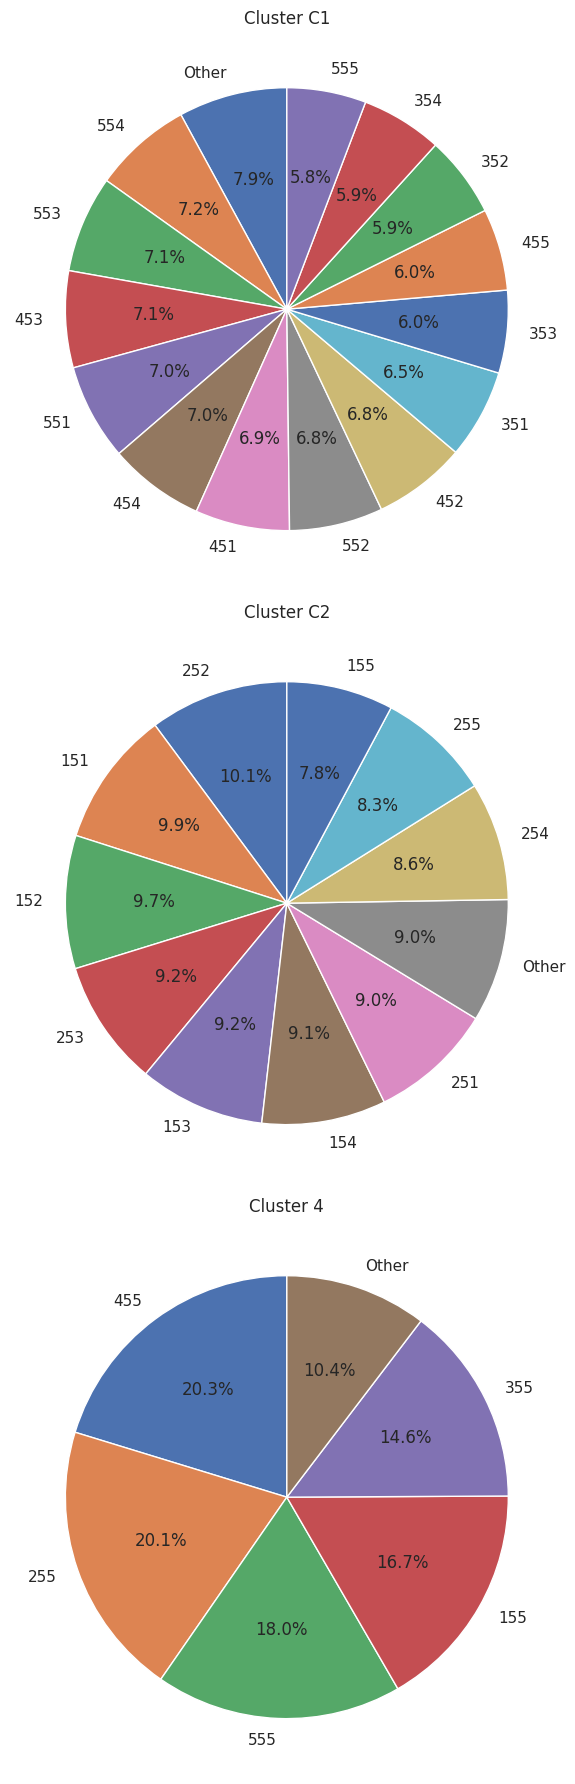

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Cluster' column to integer
concatenated_df['Cluster'] = concatenated_df['Cluster'].astype(int)

# Dictionary mapping cluster IDs to names
cluster_names = {
    0: 'Cluster C1',
    1: 'Cluster C2',
    2: 'Cluster C3',
    3: 'Cluster C4',
    5: 'Cluster C5',
}

# Group the DataFrame by Cluster and RFMClass and calculate the count
grouped = concatenated_df.groupby(['Cluster', 'RFMClass']).size().reset_index(name='Count')

# Calculate the total count for each cluster
cluster_totals = grouped.groupby('Cluster')['Count'].sum().reset_index(name='Total')

# Filter out RFMClass categories with less than 2% count within each cluster
filtered_grouped = grouped.merge(cluster_totals, on='Cluster')
filtered_grouped['Percentage'] = filtered_grouped['Count'] / filtered_grouped['Total']
filtered_grouped.loc[filtered_grouped['Percentage'] < 0.052, 'RFMClass'] = 'Other'

# Get unique clusters
clusters = filtered_grouped['Cluster'].unique()

# Create subplots for each cluster with larger size
num_clusters = len(clusters)
fig, axs = plt.subplots(num_clusters, 1, figsize=(8, 6*num_clusters))

# Iterate over clusters and create a pie chart for each
for i, cluster in enumerate(clusters):
    # Filter the grouped data for the current cluster
    cluster_data = filtered_grouped[filtered_grouped['Cluster'] == cluster]
    rfm_classes = cluster_data['RFMClass']
    counts = cluster_data['Count']

    # Calculate the count for the "Other" category within the current cluster
    other_count = counts[rfm_classes == 'Other'].sum()

    # Append the "Other" count to the counts array
    counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))

    # Append the "Other" label to the rfm_classes array
    rfm_classes = rfm_classes[rfm_classes != 'Other'].append(pd.Series('Other'))

    # Sort the counts and rfm_classes arrays in descending order
    counts, rfm_classes = zip(*sorted(zip(counts, rfm_classes), reverse=True))

    # Create the pie chart with larger size
    axs[i].pie(counts, labels=rfm_classes, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(cluster_names.get(cluster, f'Cluster {cluster}'))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



